# ANOVA

## Introduction

Analysis of Variance (ANOVA) is a powerful statistical technique used to compare the means of three or more groups. It's a cornerstone of biostatistics, helping us understand how different factors influence biological phenomena. We use it to analyze everything from the effects of various drugs on patient outcomes to the impact of environmental changes on species populations.

The type of ANOVA we use depends on how our data is structured. One-way ANOVA is used when we have *one categorical factor* with at least three levels (e.g., comparing the effectiveness of three different fertilizers on plant growth). However, many biological studies involve more complex designs.

For instance, we might want to see how a treatment affects the same individuals over time. This calls for a *repeated-measures ANOVA*, which accounts for the correlation between measurements taken on the same subject.  Or, we might have a study with both between-subject factors (like genotype) and within-subject factors (like time). This is where *mixed-design ANOVA* comes in, allowing us to analyze the interplay of these different factors.

![flowchart for selecting the right ANOVA function](https://pingouin-stats.org/build/html/_images/flowchart_one_way_ANOVA.svg)

Regardless of the type of ANOVA, the fundamental principle remains the same: we partition the observed variance in the data to determine if the variation between groups is greater than the variation within groups. This helps us determine if the factor we're interested in has a statistically significant effect.

In this chapter, we'll explore the theory behind ANOVA, including the concepts of variance partitioning and the F-statistic. Then, we'll dive into the practical application of ANOVA in Python, using powerful libraries like Pingouin and statsmodels. We'll cover one-way and two-way ANOVA, repeated-measures ANOVA, and mixed-design ANOVA, providing us with the tools and knowledge to analyze a wide range of biological datasets.

## Mathematical concepts

### Variance

At its heart, ANOVA is all about analyzing variance. Remind from the earliest chapters about quantifying scatter of continuous data, **variance** is a statistical measure that quantifies the spread or dispersion of data points around the mean. In simpler terms, it tells us how much the individual data points deviate from the average. A high variance indicates that the data points are spread out over a wide range of values, while a low variance indicates that the data points are clustered closely around the mean.

ANOVA utilizes variance to make inferences about the means of different groups. The core idea is to compare the variance *between* the groups to the variance *within* the groups:

* *Variance between groups*: this reflects the differences between the means of the groups. If the means are very different, the between-group variance will be high.
* *Variance within groups:* this reflects the variability of the data points within each group. Even if the group means are different, there will still be some variation among the individuals within each group.

By comparing these two sources of variance, ANOVA can determine if the differences between the group means are statistically significant or simply due to random chance. If the between-group variance is significantly larger than the within-group variance, it suggests that the groups are truly different from each other.

To calculate the variance of a dataset, we follow these steps:

1. Calculate the mean: sum all the data points and divide by the number of data points.
2. Calculate the deviations: subtract the mean from each data point.
3. Square the deviations: square each of the differences calculated in step 2.
4. Sum the squared deviations: add up all the squared deviations.
5. Divide by the degrees of freedom: divide the sum of squared deviations by the number of data points minus 1 (this is the degrees of freedom).

The formula for (sample) variance is:

$$s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n - 1}$$

where:

*  $x_i$ = each individual data point
*  $\bar{x}$ = the mean of the data set
*  $n$ = the number of data points

### Partitioning the sum of squares

ANOVA takes the total variability in our data and divides it into different parts, like slicing a pie. This "slicing" is called *partitioning the sum of squares*. Each slice of the pie represents a source of variation. In one-way ANOVA, we have two main slices:

1. *Between-group variability:* this represents how much the group means vary from the overall mean of the data. In essence, it captures the differences *between* our groups.
2. *Within-group variability:* this represents how much the individual data points within each group vary from their respective group means. It captures the inherent variation *within* each group.

Now, here's where the variance formula becomes crucial. To quantify these two types of variability, we use a slightly modified version of the variance formula. Instead of dividing by (n-1), we'll focus on the *sum of squared deviations*, i.e., the numerator in the variance formula:

* *Sum of squares total (SST):* this represents the *total* variability in the data. We calculate it by finding the squared difference between each data point and the overall mean of the data, then summing those squared differences. This is represented as  $\text{SS}_\text{total}$.
* *Sum of squares between (SSB):* this represents the variability *between* the groups. We calculate it by finding the squared difference between each group mean and the overall mean, weighting it by the number of observations in each group, and then summing those weighted squared differences. This is sometimes referred to as the "*effect*" and is represented as $\text{SS}_\text{effect}$.
* *Sum of squares within (SSW):* this represents the variability *within* each group. We calculate it by finding the squared difference between each data point and its group mean, then summing all those squared differences across all groups. This is also known as the "*error*" and is represented as $\text{SS}_\text{error}$.

More formally, we can express these sums of squares using the following equations:

$$
\text{SST} = \text{SS}_\text{total} = \sum_i \sum_j (x_{ij} - \overline{x})^2 \\
\text{SSB} = \text{SS}_\text{effect} = \sum_i n_i (\overline{x_i} - \overline{x})^2 \\
\text{SSW} = \text{SS}_\text{error} = \sum_i \sum_j (x_{ij} - \overline{x}_i)^2
$$

where:

- $i=1,\dots,r$ represents the groups (from 1 to *r* total groups)
- $j=1,\dots,n_i$ represents the observations within each group
- $r $ is the total number of groups
- $n_i$ is the number of observations in the $i$ th group
- $x_{ij}$ is the jth observation in the ith group
- $\overline{x_i}$ is the mean of the ith group, or "group mean"
- $\overline{x}$ is the overall mean of the data, or "grand mean"

These equations provide a precise way to calculate the different components of variance. SST captures the total variability around the grand mean, SSB captures the variability of group means around the grand mean, and SSW captures the variability of individual data points around their group means.

The beauty of this partitioning is that the total variability is equal to the sum of the between-group variability and the within-group variability:

$$\text{SST} = \text{SSB} + \text{SSW}$$

In fact:

$$
\begin{aligned}
\text{SST} &= \sum_i \sum_j (x_{ij} - \overline{x})^2 \\
&= \sum_i \sum_j (x_{ij} - \overline{x}_i + \overline{x}_i - \overline{x})^2 \\
&= \sum_i \sum_j [(x_{ij} - \overline{x}_i)^2 + 2(x_{ij} - \overline{x}_i)(\overline{x}_i - \overline{x}) + (\overline{x}_i - \overline{x})^2] \\
&= \sum_i \sum_j (x_{ij} - \overline{x}_i)^2 + 2 \sum_i \sum_j (x_{ij} - \overline{x}_i)(\overline{x}_i - \overline{x}) + \sum_i \sum_j (\overline{x}_i - \overline{x})^2
\end{aligned}
$$

The middle term simplifies to zero, since for each group *i*, the term $\sum_j (x_{ij} - \overline{x}_i)$ sums the deviations of the data points from the group mean. This sum is always zero by the definition of the mean, i.e., $\overline{x}_i = \sum_j (x_{ij})$, and since this sum is zero for each group, the entire middle term becomes zero.

The last term can be simplified by recognizing that $(\overline{x}_i - \overline{x})$ is *constant* for all data points within group *i*, i.e., with ragards to $j$. Therefore, we can move it outside the inner summation. Finally, $\sum_j 1 = n_i$ because it's simply counting the number of data points in group *i*. Therefore:

$$
\sum_i \sum_j (\overline{x}_i - \overline{x})^2 = \sum_i (\overline{x}_i - \overline{x})^2 \sum_j 1 = \sum_i (\overline{x}_i - \overline{x})^2 n_i
$$

Putting it all together, we have:

$$
\text{SST} = \sum_i \sum_j (x_{ij} - \overline{x})^2 = \sum_i \sum_j (x_{ij} - \overline{x}_i)^2 + \sum_i n_i (\overline{x}_i - \overline{x})^2 = \text{SSW} + \text{SSB}
$$

By breaking down the total variability, we can assess the *relative contributions* of between-group and within-group variation. If the between-group variability (SSB) is a large proportion of the total variability (SST), it suggests that the group means are quite different, and the factor we're investigating has a strong effect.

This partitioning of the sum of squares is directly related to comparing different models to explain the data, as discussed in an ealier chapter. In one-way ANOVA, we're essentially comparing two models: a *null model* that assumes no difference between group means (like a single horizontal line) and an *alternative model* that allows for differences between group means. SST represents the total variability under the null model. SSW represents the variability remaining after fitting the alternative model, and SSR represents the reduction in variability achieved by using the alternative model. This connects to the concept of R-squared, which is the proportion of total variation explained by the alternative model (SSR/SST).

### F-statistic

Recall from our earlier exploration of the comparison of models that we used the F-statistic to assess the significance of a regression model. The F-statistic isn't unique to ANOVA; it's a general tool for comparing models and assessing the amount of variation explained by a particular model.

In the context of ANOVA, we're essentially comparing two models: a null model that assumes no difference between group means and an alternative model that allows for differences. The F-statistic helps us determine if the alternative model (with group differences) provides a significantly better fit to the data than the null model.

Recall that in the context of comparing models, we calculated the F-statistic as:

$$F = \frac{\text{MSR}}{\text{MSE}} = \frac{\text{SST} - \text{SSE}}{\text{SSE}/(n - 2)}$$

where:

* MSR is the mean square regression
* MSE is the mean square error
* SST is the total sum of squares
* SSE is the sum of squares error

In ANOVA, we use slightly different terminology, but the underlying concept is the same. We calculate the F-statistic as:

$$F = \frac{\text{MS}_{\text{effect}}}{\text{MS}_{\text{error}}} = \frac{\text{SS}_{\text{effect}} / (r - 1)}{\text{SS}_{\text{error}} / (N - r)}$$

where:

* $\text{MS}_{\text{effect}}$ is the mean square effect (analogous to MSR)
* $\text{MS}_{\text{error}}$ is the mean square error (analogous to MSE)
* $\text{SS}_{\text{effect}}$ is the sum of squares effect (analogous to SSR)
* $\text{SS}_{\text{error}}$ is the sum of squares error (analogous to SSE)
* $r$ is the number of groups
* $N$ is the total number of observations

Essentially, the "effect" in ANOVA corresponds to the "regression" in the regression context. Both represent the improvement in explaining the data achieved by the more complex model.

### P value

The F-statistic itself doesn't directly tell us whether the observed differences between group means are statistically significant. To make that determination, we need the *P value*.

The P value is the probability of obtaining an F-statistic as extreme as the one we calculated, assuming that the null hypothesis is true, i.e., assuming there are no real differences between the group means: $\overline{x_1} = \overline{x_2} = \dots = \overline{x_i}$.

To find the P value, we use the **F-distribution**. This is a probability distribution that describes the behavior of F-statistics under the *null hypothesis*. The shape of the F-distribution depends on the degrees of freedom associated with the between-group and within-group variances.

In one-way ANOVA, the F-distribution has:

* Degrees of freedom for the numerator:  $r - 1$ (where $r$ is the number of groups)
* Degrees of freedom for the denominator: $N - r$ (where $N$ is the total number of observations)

Using these degrees of freedom, we can look up the P value corresponding to our calculated F-statistic in a statistical table or use software to calculate it directly (as we'll see in the Python examples).

A small P value (typically less than 0.05) indicates that it's unlikely to observe such an extreme F-statistic if the null hypothesis were true. This provides evidence against the null hypothesis, leading us to reject it and conclude that there's a statistically significant difference between at least one pair of group means.

On the other hand, a large P value (greater than 0.05) suggests that the observed F-statistic is not unusual under the null hypothesis. In this case, we fail to reject the null hypothesis and conclude that there's not enough evidence to suggest a difference between the group means.

### Effect size

#### Eta-squared

While the F-statistic and P value tell us whether there's a statistically significant difference between group means, they don't tell us how large that difference is. To quantify the magnitude of the effect, we use a measure called **eta-squared** ($\eta^2$).

Eta-squared represents the proportion of total variability in the data that is accounted for by the differences between groups. It's calculated as:

$$\eta^2 = \frac{\text{SS}_{\text{effect}}}{\text{SS}_{\text{total}}}$$

Eta-squared can be interpreted similarly to R-squared in regression. For example, an $\eta^2$ of 0.10 means that 10% of the total variability in the data is explained by the differences between the groups.

In one-way ANOVA, eta-squared is equivalent to *partial eta-squared* ($\eta_p^2$), which is a more general measure of effect size used in other ANOVA designs. Partial eta-squared is calculated as:

$$\eta_p^2 = \frac{\text{SS}_{\text{effect}}}{\text{SS}_{\text{effect}} + \text{SS}_{\text{error}}}$$

Eta-squared provides valuable information about the practical significance of our findings. A larger eta-squared indicates a stronger effect, meaning that the group differences account for a greater proportion of the overall variability in the data.

While there are no strict cutoffs, general guidelines suggest that:

* $\eta^2$ = 0.01 indicates a small effect
* $\eta^2$ = 0.06 indicates a medium effect
* $\eta^2$ = 0.14 indicates a large effect

#### Omega-squared

While eta-squared ($\eta^2$) is a commonly used effect size measure in ANOVA, it tends to *overestimate* the population effect size, especially when the sample size is small. This bias arises because eta-squared is calculated based on the sample sums of squares, which are inherently influenced by sampling variability. To address this bias, we can use **omega squared** ($\omega^2$), which provides a less biased estimate of the population effect size. Omega squared adjusts for the degrees of freedom and the within-group variance, resulting in a more accurate estimate, particularly for smaller samples:

$$\omega^2 = \frac{\text{SS}_{\text{effect}} - (r - 1) \text{MS}_{\text{error}}}{\text{SS}_{\text{total}} + \text{MS}_{\text{error}}}$$

where:

* $\text{SS}_{\text{effect}}$ is the sum of squares between groups
* $\text{MS}_{\text{error}}$ is the mean square error (within groups)
* $\text{SS}_{\text{total}}$ is the total sum of squares
* $r$ is the number of groups

Omega squared, like eta-squared, represents the proportion of variance in the dependent variable that is accounted for by the independent variable (or factor). However, it provides a more accurate estimate, especially when sample sizes are small. It will generally be *smaller* than eta-squared, reflecting its less biased nature. The difference between the two measures becomes less pronounced as the sample size increases.

While $\eta^2$ is often reported due to its simplicity and familiarity, it's generally recommended to use $\omega^2$ as a more accurate measure of effect size in ANOVA, particularly when dealing with smaller samples.

By considering both the statistical significance (P value) and the effect size ($\eta^2$ or $\omega^2$), we can gain a more complete understanding of the results of our ANOVA analysis.

## Calculating ANOVA manually

Before diving into using dedicated Python libraries for ANOVA, let's solidify our understanding by manually calculating an ANOVA table and visualizing the F-distribution. This will give us a deeper appreciation for the underlying calculations and how to interpret the results.

### Manual calculation of the ANOVA table

An ANOVA table provides a structured summary of the key calculations involved in ANOVA. Here's how we can construct it step-by-step:

1. Organize the data
2. Calculate the degrees of freedom
3. Calculate the sums of squares:
   - Calculate SST / SS<sub>total</sub> (total sum of squares)
   - Calculate SSB / SS<sub>effect</sub> (sum of squares between groups)
   - Calculate SSW / SS<sub>error</sub> (sum of squares within groups)
4. Calculate the mean squares
5. Calculate the F-statistic
6. Determine the P value using the `scipy.stats` module
7. Construct the ANOVA table

To solidify our understanding of the calculations behind ANOVA, let's manually compute the sums of squares for the effect (SSB) and error (SSW). We'll use the [`anova` dataset from the Pingouin library](https://pingouin-stats.org/build/html/generated/pingouin.list_dataset.html) as an example. This dataset provides pain threshold scores for individuals with different hair colors (light blond, dark blond, light brunette, and dark brunette). The original study aimed to investigate whether hair color is related to pain tolerance, as studied by [McClave and Dietrich (1991)](http://www.statsci.org/data/oz/blonds.html).

In [313]:
import pandas as pd
import pingouin as pg

# Load the 'anova' dataset from pingouin
data_anova = pg.read_dataset('anova')

# Display the first few rows of the DataFrame
data_anova.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


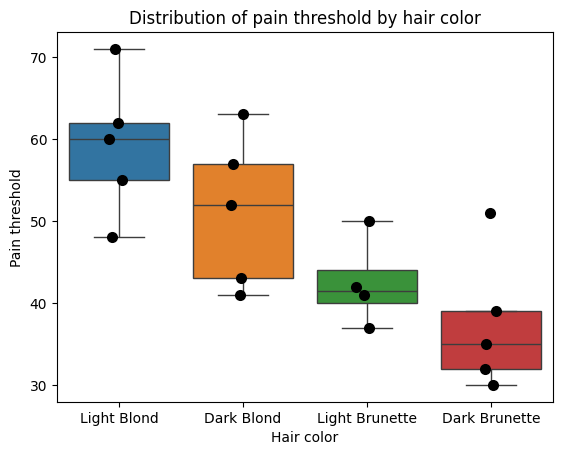

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x='Hair color', y='Pain threshold', data=data_anova, hue='Hair color', showfliers=False)

# Overlay the stripplot
sns.stripplot(
    x='Hair color', y='Pain threshold', data=data_anova,
    color='black', size=8)

# Add plot labels and title
plt.xlabel('Hair color')
plt.ylabel('Pain threshold')
plt.title('Distribution of pain threshold by hair color');

In [315]:
# Parameters of the analysis
r = data_anova['Hair color'].nunique() # Number of groups/conditions
N = len(data_anova)                    # Number of total values
DF_between = r - 1       # Degrees of freedom for MSeffect
DF_within  = N - r       # Degrees of freedom for MSerror

print(f"There are {r} different conditions and {N} total values")
print(
    f"This leads to {DF_between} and {DF_within} degrees of freedom for the effect (SSB) and error (SSW) mean squares respectively")

There are 4 different conditions and 19 total values
This leads to 3 and 15 degrees of freedom for the effect (SSB) and error (SSW) mean squares respectively


In [316]:
# Calculate the overall mean of 'Pain threshold'
grand_mean = data_anova['Pain threshold'].mean()
print(f"Grand mean = {grand_mean:.2f}")

# Sums of squares
# $\text{SST} = \sum_i \sum_j (x_{ij} - \overline{x})^2$
SST = ((data_anova['Pain threshold'] - grand_mean)**2).sum()

# $\text{SSW} = \sum_i \sum_j (x_{ij} - \overline{x}_i)^2$
SSW = (
    data_anova.groupby('Hair color')['Pain threshold']
    .transform(lambda x: (x - x.mean())**2)
).sum()

SSB = SST - SSW

print(f"With SST = {SST:.1f} and SSW = {SSW:.1f}, we obtain SSB = {SSB:.1f}")

# Compute SSB from scratch for verification
SSB_scratch = (
    data_anova.groupby('Hair color')['Pain threshold']
    .apply(lambda x: x.count() * (x.mean() - grand_mean)**2)
).sum()

print(f"SSB computed from scratch = {SSB_scratch:.1f}")

Grand mean = 47.84
With SST = 2362.5 and SSW = 1001.8, we obtain SSB = 1360.7
SSB computed from scratch = 1360.7


We can view comparing three or more means with one-way ANOVA as comparing how well two different models fit the data:

- Null model: this model assumes that all populations have the same mean, which is equivalent to the grand mean of the combined data. In essence, this model suggests that there are no real differences between the groups, and any observed differences are due to random chance.
- Alternative model: this model allows for the possibility that the population means are not all equal. This means that at least one group has a mean that is different from the others, suggesting that there are genuine differences between the groups.

| Hypothesis  | Scatter from | Sum of squares | Percentage of variation | R²    |
|:----------- |:------------ |:-------------- |:------------------------|:------|
| Null        | Grand mean   | 2362.5         | 100                     |       |
| Alternative | Group means  | 1001.8         | 42.4                    |       |
| Difference  |              | 1360.7         | 57.6                    | 0.576 |

This table summarizes the partitioning of variance in our ANOVA analysis, comparing the variability explained by the grand mean (null hypothesis) to the variability explained by the group means (alternative hypothesis).

- The first row represents the null hypothesis, where we assume all data points are scattered around the grand mean. This accounts for 100% of the total variation.
- The second row represents the alternative hypothesis, where we consider the variability of data points around their respective group means. This accounts for 42.4% of the total variation.
- The third row shows the difference between the two models, representing the variability explained by the differences between group means. This accounts for 57.6% of the total variation and corresponds to an R² of 0.576.

In essence, this table illustrates how ANOVA partitions the total variability and assesses the proportion of variability explained by the grouping factor. By comparing these two models, ANOVA helps us determine which model provides a better explanation of the observed data. If the alternative model fits the data significantly better than the null model, we have evidence to reject the null hypothesis and conclude that there are significant differences between the group means.

In [317]:
# MS
MS_between = SSB / DF_between
MS_within  = SSW / DF_within

print(f"MS for SSB = {MS_between:.1f} and for SSW = {MS_within:.1f}")

MS for SSB = 453.6 and for SSW = 66.8


In [318]:
from scipy.stats import f

# F ratio and associated P value
f_ratio = MS_between / MS_within
p_value = f.sf(f_ratio, DF_between, DF_within)  # Using the survival function (1 - cdf)

print(f"Finally, with an F ratio = {f_ratio:.4f}, the associated P value = {p_value:.5f}")

Finally, with an F ratio = 6.7914, the associated P value = 0.00411


### ANOVA table

We've explored the key components of analysis of variance: sums of squares (SST, SSB, SSW), degrees of freedom, and mean squares (MS<sub>effect</sub>, MS<sub>error</sub>). These elements come together in a structured way within the **ANOVA table**. This table provides a framework for comparing a model that assumes no difference between group means (our null hypothesis) to a model that allows for differences between group means.

Here's the ANOVA table we constructed for our example analyzing the effect of hair color on pain threshold:

| Source of variation | Sum of squares | DF | MS    | F-ratio | P value |
|---------------------|----------------|----|-------|---------|---------|
| Between Groups      | 1360.7         | 3  | 453.6 | 6.791   | 0.0041  |
| Within Groups       | 1001.8         | 15 | 66.8  |         |         |
| Total               | 2362.5         | 18 |       |         |         |

The table partitions the total variation (SST) into the variation explained by differences between the groups (SSB) and the unexplained variation within groups (SSW). The degrees of freedom (DF) are shown for each source of variation. The mean squares (MS) are calculated by dividing the sum of squares by the corresponding degrees of freedom. The F-ratio, calculated as MS<sub>between</sub> / MS<sub>within</sub>, compares the explained and unexplained variation, adjusted for their degrees of freedom. Fianlly, the P value helps us determine the statistical significance of the F-ratio.

If the null hypothesis were true (i.e., if there were no differences between the means of the hair color groups), we would expect the two MS values (MS<sub>between</sub> and MS<sub>within</sub>) to be similar, resulting in an F-ratio close to 1.0. However, in our example, the F-ratio is 6.791, suggesting that the differences between groups explain significantly more variation than would be expected by chance. This small P value (0.0041) provides strong evidence against the null hypothesis, leading us to conclude that there are significant differences in pain threshold between at least two of the hair color groups.

### ANOVA reconstruction from summary data

One-way ANOVA can be computed *without raw data*, so long as we know the mean, sample size, and standard deviation (or standard error) of each group. This is particularly useful in situations where we only have access to aggregated data or when the original dataset is too large to store.

To reconstruct the ANOVA table from summary statistics, we can use the following formulas:

- $\text{SS}_\text{total} = \text{SS}_\text{effect} + \text{SS}_\text{error}$
- $\text{SS}_\text{effect} = \sum n_i (\overline{x_i} - \overline{x})^2$, where $n_i$ is the sample size of group $i$, $\overline{x_i}$ is the mean of group $i$, and $\overline{x}$ is the overall mean
- $\text{SS}_\text{error} = \sum (n_i - 1) s_i^2$, where $s_i^2$ is the variance of group $i$

To find the last formula, we  start with the basic definition of SSW: $\text{SS}_\text{error} = \sum_i \sum_j (x_{ij} - \overline{x}_i)^2$. Recall the formula for the variance of a sample from the very early chapters, where $s^2 = \frac{\sum_{j}(x_j - \bar{x})^2}{n - 1}$. Notice the similarity between the numerator of the variance formula and the formula for SSW.

If we rearrange the variance formula to isolate the sum of squares, we get $\sum_{j}(x_j - \bar{x})^2 = (n - 1) s^2$. Then, we apply this to each group $i$ in the ANOVA to get $\sum_{j=1}^{n_i}(x_{ij} - \overline{x}_i)^2 = (n_i - 1) s_i^2$.

Finally, we sum the sum of squares for each group $\text{SSW} = \text{SS}_\text{error} = \sum_i \sum_{j=1}^{n_i}(x_{ij} - \overline{x}_i)^2 = \sum_i (n_i - 1) s_i^2$.

Once we have the sums of squares, we can calculate the mean squares (MS) by dividing the sum of squares by the corresponding degrees of freedom. The F-statistic is then computed as the ratio of the mean squares (MS<sub>effect</sub> / MS<sub>error</sub>), and the P value can be obtained using the F-distribution.

Consider the 'Pain threshold' variable from the `ANOVA` dataset and the following group summary statistics.

In [319]:
data_anova.groupby('Hair color').agg(['mean', 'std', 'count']).loc[:, 'Pain threshold']

,mean,std,count
Hair color,,,
Dark Blond,51.2,9.284396,5
Dark Brunette,37.4,8.324662,5
Light Blond,59.2,8.526429,5
Light Brunette,42.5,5.446712,4


#### Calculating SSB

The SSB or SS<sub>effect</sub> quantifies the variability between the group means and the overall mean. It's calculated as the sum of the squared differences between each group mean ($\overline{x}_i$) and the grand mean ($\overline{x}$), weighted by the number of data points in each group ($n_i$).

In this example, the grand mean ($\overline{x}$) is 47.842, as calculated previously. 

| Group          | Mean  | Grand mean | Count | Calculation of SSB              |
|:-------------- |:----- |:-----------|:----- |:------------------------------- |
| Dark Blond     | 51.2  | 47.842     | 5     | 5 * (51.2 - 47.842)**2 = 56.38  |
| Dark Brunette  | 37.4  | 47.842     | 5     | 5 * (37.4 - 47.842)**2 = 545.18 |
| Light Blond    | 59.2  | 47.842     | 5     | 5 * (59.2 - 47.842)**2 = 645.02 |
| Light Brunette | 42.5  | 47.842     | 4     | 4 * (42.5 - 47.842)**2 = 114.15 |
| *Sum*          |       |            |       | **SSB =  1360.725**             |

We calculate the squared difference between each group mean and the grand mean, multiply it by the group size, and sum these values across all groups to obtain SSB = 1360.725.

#### Calculating SSW

SSW or SS<sub>error</sub>, measures the variability within each group. It's calculated as the sum of the squared differences between each data point and its group mean. When we don't have access to the individual data points, we can still calculate SSW using the standard deviation of each group.

| Group          | Standard deviation | Count | Calculation of SSW          |
|:-------------- |:------------------ |:----- |:--------------------------- |
| Dark Blond     | 9.284              | 5     | (5 - 1) * 9.284**2 = 344.77 |
| Dark Brunette  | 8.325              | 5     | (5 - 1) * 8.325**2 = 277.22 |
| Light Blond    | 8.526              | 5     | (5 - 1) * 8.526**2 = 290.77 |
| Light Brunette | 5.447              | 4     | (4 - 1) * 5.447**2 = 89.01  |
| *Sum*          |                    |       | **SSW =  1001.77**          |

We calculate the SSW for each group using the formula $(n_i - 1) s_i^2$ and then sum these values to obtain the total SSW, which, in this case, is 1001.77. This matches the SSB and SSW values we calculated previously using the raw data, to the decimal approximation, confirming the accuracy of our approach. We can automatize this approach using Python.

In [320]:
# Calculate the overall mean of 'Pain threshold'
grand_mean = data_anova['Pain threshold'].mean()
print(f"Grand mean = {grand_mean:.4f}")

# Group by 'Hair color' and calculate relevant statistics
calc_table = data_anova.groupby('Hair color')['Pain threshold'].agg(['count', 'mean', 'std'])

# Calculate SSeffect and SSerror
calc_table['SSB'] = calc_table['count'] * (calc_table['mean'] - grand_mean)**2
calc_table['SSW'] = (calc_table['count'] - 1) * calc_table['std']**2

# Add a sum row
calc_table.loc['sum'] = calc_table.sum()

# Display the table
pg.print_table(calc_table.reset_index(), floatfmt='.4f', tablefmt='simple')

print(
    f"The values to be used in the ANOVA table are: "
    f"SSB = {calc_table.loc['sum','SSB']:.1f}, and "
    f"SSW = {calc_table.loc['sum','SSW']:.1f}"
)

Grand mean = 47.8421
Hair color        count      mean      std        SSB        SSW
--------------  -------  --------  -------  ---------  ---------
Dark Blond       5.0000   51.2000   9.2844    56.3773   344.8000
Dark Brunette    5.0000   37.4000   8.3247   545.1878   277.2000
Light Blond      5.0000   59.2000   8.5264   645.0089   290.8000
Light Brunette   4.0000   42.5000   5.4467   114.1524    89.0000
sum             19.0000  190.3000  31.5822  1360.7263  1001.8000

The values to be used in the ANOVA table are: SSB = 1360.7, and SSW = 1001.8


### Visualizing the F-distribution and critical values

Visualizing the F-distribution can help us understand the meaning of the F-statistic and the P value. It also allows us to see how the critical F-value relates to our calculated F-statistic and the significance level ($\alpha$).

We can use the `scipy.stats` module in Python to plot the F-distribution and shade the areas corresponding to the P value and the $\alpha$ level, as we did in earlier chapters on comparing models and in nonlinear regression. This visualization provides a clear picture of:

- The shape of the F-distribution for our specific degrees of freedom.
- How extreme our observed F-statistic is under the null hypothesis.
- The location of the critical F-value and its relationship to alpha.
- The relationship between the p-value and the area under the curve beyond the F-statistic.

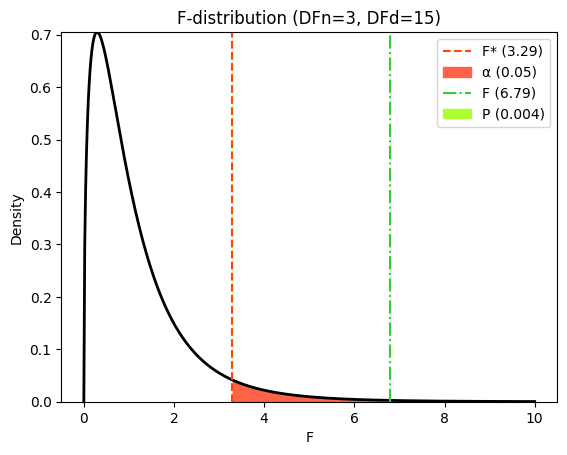

In [321]:
import numpy as np

# Significance level (alpha)
α = 0.05

# Calculate critical F-value
f_crit = f(dfn=DF_between, dfd=DF_within).ppf(1 - α)

# Generate x values for plotting
x_f = np.linspace(0, 10, 500)  # Adjusted range for better visualization
hx_f = f.pdf(x_f, DF_between, DF_within)

# Create the plot
plt.plot(x_f, hx_f, lw=2, color='black')

# Critical value
plt.axvline(
    x=f_crit,
    color='orangered',
    linestyle='--',
    label=f"F* ({f_crit:.2f})")

# Alpha area
plt.fill_between(
    x_f[x_f >= f_crit],
    hx_f[x_f >= f_crit],
    color='tomato',
    label=f"α ({α})")

# F-statistic
plt.axvline(
    x=f_ratio,
    color='limegreen',
    linestyle='-.',
    label=f"F ({f_ratio:.2f})")

# P value area
plt.fill_between(
    x_f[x_f >= f_ratio],
    hx_f[x_f >= f_ratio],
    color='greenyellow',
    label=f"P ({p_value:.3f})")

plt.xlabel("F")
plt.ylabel('Density')
plt.title(f"F-distribution (DFn={DF_between}, DFd={DF_within})")
plt.margins(x=0.05, y=0)
plt.legend();

## Practical application with Python

Now that we've established the core mathematical concepts behind ANOVA, let's move on to the practical application. In this section, we'll explore how to perform ANOVA using Python, leveraging powerful libraries like Pingouin and statsmodels. We'll start with one-way ANOVA and then delve into more complex designs.

### One-way ANOVA with Pingouin

As we have seen at multiple occasions in the previous chapters, the Pingouin library is a powerful and user-friendly Python package specifically designed for statistical analysis. It also provides a wide range of functions for conducting ANOVA, including [one-way ANOVA, repeated-measures ANOVA, and mixed-design ANOVA](https://pingouin-stats.org/build/html/guidelines.html#anova).

Let's perform [one-way ANOVA using Pingouin](https://pingouin-stats.org/build/html/generated/pingouin.anova.html).

Having loaded the `anova` dataset for the manual calculations, we are now ready to use it for one-way ANOVA.

In [322]:
# data_anova = pg.read_dataset('anova')
# data_anova.head()

#### Normality test

Before conducting ANOVA, it's essential to check if the data within each group follows a normal distribution. This *normality assumption* is crucial because ANOVA is based on the assumption that the data are normally distributed within each group.

To test for normality, we can use various statistical tests and graphical methods, as discussed extensively throughout this book. One common approach is the Shapiro-Wilk test, which assesses whether the data deviates significantly from a normal distribution. Additionally, visual tools like histograms and Q-Q plots can provide insights into the data's distribution and help identify potential departures from normality.

In [323]:
print(pg.normality(data=data_anova, dv='Pain threshold', group='Hair color'))

                       W      pval  normal
Hair color                                
Light Blond     0.991032  0.983181    True
Dark Blond      0.939790  0.664457    True
Light Brunette  0.930607  0.597974    True
Dark Brunette   0.883214  0.324129    True


Here, it is satisfied for all groups. However, if normality were violated in other cases, transformations (e.g., logarithmic or square root) could be applied to attempt to normalize the data before performing ANOVA. If normalization is not possible, the Kruskal-Wallis test provides a non-parametric alternative.

#### Homoscedasticity

Another crucial assumption of ANOVA is homogeneity of variances, also known as *homoscedasticity*. This assumption states that the variances of the groups being compared should be roughly equal.

To test for homogeneity of variances, we can use Levene's test or Bartlett's test, discussed previously. These tests assess whether there are significant differences in the variances of the groups.

In [324]:
print(pg.homoscedasticity(data=data_anova, dv='Pain threshold', group='Hair color'))

               W      pval  equal_var
levene  0.392743  0.760016       True


Here, this assumption is also met. If, however, variances were unequal in other analyses, Welch's ANOVA (discussed later in the chapter) which does not assume equal variances, would be employed. Transformations could also be considered in an attempt to achieve homoscedasticity.

#### Conducting the ANOVA

Since the data meet the assumptions of normality and homoscedasticity, we can proceed with standard ANOVA. The `anova` function in Pingouin provides a convenient way to perform this analysis. 

By setting the `detailed=True` argument, we can obtain a more comprehensive output that includes additional information beyond the basic ANOVA results. This detailed output can provide valuable insights into the data and the effects of the independent variable.

In [325]:
aov = pg.anova(
    data=data_anova,
    dv='Pain threshold',
    between='Hair color',
    detailed=True
)

print(aov.round(3))  # Round the output to 3 decimal places for better readability

       Source        SS  DF       MS      F  p-unc    np2
0  Hair color  1360.726   3  453.575  6.791  0.004  0.576
1      Within  1001.800  15   66.787    NaN    NaN    NaN


The output is a DataFrame containing the sums of squares (between groups = 1360.726, within groups = 1001.8), along with the corresponding degrees of freedom and mean squares. The F-statistic and its associated P value are also provided. These values are consistent with the manual calculations performed earlier. Notably, the DataFrame also includes effect size measures.

While Pingouin's `anova` function can be used independently (`pg.anova`), it's often more convenient to call it directly on a pandas DataFrame (`df.anova()`) when the data is already in that format.  or a more compact output, set `detailed=False`. The `effsize` argument controls the effect size measure; by default, partial eta-squared is reported, but setting `effsize='n2'` will return standard eta-squared.

In [326]:
print(
    data_anova.anova(
    dv='Pain threshold',
    between='Hair color',
    detailed=False,
    effsize='n2'
    ) # type: ignore
)

       Source  ddof1  ddof2         F     p-unc        n2
0  Hair color      3     15  6.791407  0.004114  0.575962


Calculating $\omega^2$ requires manual application of the relevant formula (derived from the definition given previously).

In [327]:
formulas = [
    lambda: (SSB - (r-1) * MS_within) / (SST + MS_within),  # original formula defined in the introduction
    lambda: DF_between * (MS_between - MS_within) / (SST + MS_within),
    lambda: (r-1) * (f_ratio-1) / ((r-1) * (f_ratio-1) + N)
]

for i, formula in enumerate(formulas):
    print(f"ω² (formula {i+1}) = {formula():.8f}")

ω² (formula 1) = 0.47765205
ω² (formula 2) = 0.47765205
ω² (formula 3) = 0.47765205


### One-way ANOVA with scipy.stats

While libraries like Pingouin offer convenient functions for conducting ANOVA, it's also beneficial to understand how to perform ANOVA using the core statistical functions available in `scipy.stats`. The [`f_oneway` function](https://www.google.com/url?sa=E&source=gmail&q=[https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html]\(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html\)) in `scipy.stats` provides a straightforward way to conduct one-way ANOVA. The function takes one parameter, which is a list of sample groups. Each sample group represents the measurements for a particular group or condition in the experiment.

In [328]:
from scipy.stats import f_oneway

# Perform one-way ANOVA using scipy.stats
hair_colors = data_anova['Hair color'].unique()
groups = [data_anova['Pain threshold'][data_anova['Hair color'] == color] for color in hair_colors]
F_scipy, p_scipy = f_oneway(*groups)

# similar to 
# F, p = f_oneway(
#     data[data['Hair color'] == 'Dark Blond']['Pain threshold'],
#     data[data['Hair color'] == 'Dark Brunette']['Pain threshold'],
#     data[data['Hair color'] == 'Light Blond']['Pain threshold'],
#     data[data['Hair color'] == 'Light Brunette']['Pain threshold'],
# )

print(f"F statistic = {F_scipy:.3f} with P value from the F distribution = {p_scipy:.5f}")

F statistic = 6.791 with P value from the F distribution = 0.00411


### One-way ANOVA using statsmodels

We can also perform ANOVA using the statsmodels library. It provides a comprehensive set of tools for statistical modeling, including a [robust framework for ANOVA](https://www.statsmodels.org/stable/anova.html). While Pingouin focuses on ease of use and `scipy.stats` offers core statistical functions, statsmodels gives us more flexibility in specifying and fitting different ANOVA models.

One of the key advantages of statsmodels is its explicit link to regression analysis. As we discussed in previous chapters, ANOVA can be viewed as a special case of linear regression where the predictor variables are categorical. statsmodels allows us to leverage this connection by formulating ANOVA models using its formula API, which utilizes the Patsy library for formula parsing.

When using the statsmodels formula API, we need to ensure that variable names adhere to standard Python conventions. This means avoiding special characters like periods (`.`) or hyphens (`-`). If our dataset contains such characters in variable names, we can use Patsy's `Q()` function to quote these names, ensuring they are interpreted correctly.

Additionally, the `C()` function in statsmodels is essential for specifying *categorical variables*, as it handles the grouping structure correctly. However, in our case, since the 'Hair color' variable already contains string values, statsmodels will automatically treat it as a categorical variable.

In [329]:
from statsmodels.formula.api import ols

formula = "Q('Pain threshold') ~ Q('Hair color')"

# Prepare the one-way ANOVA model using statsmodels
model_anova_statsmodels = ols(formula=formula, data=data_anova)

# Fit the model
results_anova_statsmodels = model_anova_statsmodels.fit()

# Print the model summary
print(results_anova_statsmodels.summary2())

                          Results: Ordinary least squares
Model:                   OLS                      Adj. R-squared:          0.491   
Dependent Variable:      Q('Pain threshold')      AIC:                     137.2568
Date:                    2025-02-18 09:28         BIC:                     141.0346
No. Observations:        19                       Log-Likelihood:          -64.628 
Df Model:                3                        F-statistic:             6.791   
Df Residuals:            15                       Prob (F-statistic):      0.00411 
R-squared:               0.576                    Scale:                   66.787  
-----------------------------------------------------------------------------------
                                   Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------------------------
Intercept                          51.2000   3.6548 14.0091 0.0000  43.4100 58.9900
Q('Hair color')[T.

c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


Since our primary focus is on the ANOVA results and not the detailed OLS regression output, although we can determine the degrees of freedom, the F-statistics and the associated P value.

We can use the [`anova_lm` function in statsmodels to directly obtain the ANOVA table](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html). This function takes the fitted OLS model as an argument and returns the ANOVA table, which summarizes the key information about the sources of variation, degrees of freedom, sums of squares, mean squares, F-statistic, and P value.

In [330]:
from statsmodels.stats.anova import anova_lm

# Obtain the ANOVA table
anova_table_statsmodels = anova_lm(results_anova_statsmodels, typ=1)
print(anova_table_statsmodels.round(3))  # Print the rounded ANOVA table

                   df    sum_sq  mean_sq      F  PR(>F)
Q('Hair color')   3.0  1360.726  453.575  6.791   0.004
Residual         15.0  1001.800   66.787    NaN     NaN


While we obtained similar results using Pingouin and `scipy.stats`, statsmodels offers greater flexibility for more complex ANOVA designs, such as factorial ANOVA and ANCOVA, and allows us to specify models using R-like formulas. Additionally, statsmodels provides a deeper connection to regression analysis, enabling us to explore the relationships between variables in more detail.

## Repeated measures ANOVA

Repeated measures ANOVA (**rmANOVA**) is used when we have measurements that are repeatedly taken on the same subjects or entities. This design is common in many research fields, including biology, where we might track the growth of plants over time, measure the response of patients to a drug at multiple intervals, or observe the behavior of animals under different conditions.

Here are some scenarios where rmANOVA is appropriate:

* Measurements made repeatedly for each subject: we might measure the blood pressure of patients before, during, and after treatment.
* Subjects recruited as matched sets: we might recruit pairs of twins and assign one twin to a treatment group and the other to a control group.
* Experiment run several times: we might conduct an experiment multiple times, each time with different subjects, but under the same conditions.

More generally, we should use a repeated measures test whenever we expect the measurements within a subject (or *matched set*) to be more similar to each other than to measurements from other subjects.

*One-way rmANOVA* can be viewed as an extension of the paired-samples t-test, but for comparing the means of three or more levels of a within-subjects variable. rmANOVA designs can be more complex, for example, two-way rmANOVA is used to evaluate simultaneously the effect of two within-subject factors on a continuous outcome variable. In this section, we focus on one-way rmANOVA.

### Partitioning variance in rmANOVA

In one-way repeated measures ANOVA, the total variance is partitioned into three components:

* *Sum of squares between (SSB) or SS<sub>effect</sub>*: this is the variance explained by the factor of interest (e.g., time or treatment)
* *Sum of squares subjects (SSS) or SS<sub>subjects</sub>*; this is the variance attributed to *individual differences* between subjects. This is calculated as:

    $$\text{SSS} = \text{SS}_\text{subjects} = r \sum_s (\overline{x}_s - \overline{x})^2$$

    where $r$ is the number of repeated measurements, $\overline{x}_s$ is the mean for subject *s* **across all measurements**, and $\overline{x}$ is the grand mean.
* *Sum of suares within (SSW) or SS<sub>error</sub>*: this is the unexplained or residual variance, after accounting for the effect of the within-subjects factor and the individual differences between subjects.

While the concept of partitioning variance is similar to standard ANOVA, the formulas for SS<sub>effect</sub> and SS<sub>error</sub> in repeated measures ANOVA are more complex and need to account for the within-subject correlations. We won't delve into the exact formulas here, as they involve matrix operations.

However, we can still compute the total *sum of squares (SST)* using the universal formula $\text{SST} = \text{SS}_\text{total} = \sum_i \sum_j (x_{ij} - \overline{x})^2$. The sum of squares for the effect (SSB or SS<sub>effect</sub>) is determined on a group basis similar to standard ANOVA. We know that the total variation is partitioned as follows:

$$
\text{SS}_\text{total} = \text{SS}_\text{effect} + \text{SS}_\text{subjects} + \text{SS}_\text{error}
$$

or, using abbreviations $\text{SST} = \text{SSB} + \text{SSS} + \text{SSW}$. This partitioning allows us to calculate the remaining sum of squares (SSW or SS<sub>error</sub>) by subtracting SSS and SSB from SST, as we demonstrated in the previous calculations.

### Calculating the F-statistic

The F-statistic in rmANOVA is calculated as:

$$
F = \frac{\text{MS}_\text{effect}}{\text{MS}_\text{error}} 
= \frac{\text{SS}_{\text{effect}} / (r - 1)}{\text{SS}_{\text{error}} / [(n - 1)(r - 1)]}
$$

Here, *r* is the number of repeated measurements (or levels of the factor) and *n* is the number of subjects.

The key difference lies in the denominator of the F-ratio. In standard ANOVA, the error degrees of freedom are calculated as $N - r$, while in rmANOVA, they are calculated as $(n - 1)(r - 1)$. This difference reflects the fact that in rmANOVA, we are accounting for the individual differences between subjects, which *reduces* the error variance and can lead to increased power in detecting significant effects.

The P value can then be calculated using an F-distribution with $(r - 1)$ and $(n - 1)(r - 1)$ degrees of freedom.

### Advantages of rmANOVA

Repeated measures ANOVA offers several advantages over traditional one-way ANOVA:

* *Increased power:* by accounting for individual differences between subjects, rmANOVA can be more powerful in detecting significant effects.
* *Reduced error variance:* the SS<sub>subjects</sub> term captures some of the variability that would otherwise be included in the error term, leading to a smaller error variance and increased power.
* *Efficiency:* fewer subjects are needed compared to an independent groups design to achieve the same level of power.

### Calculating rmANOVA Manually

As we did for one-way ANOVA, we'll now manually calculate the steps involved in repeated measures ANOVA. Let's create a dataset where we measure the blood pressure of 15 patients before, during, and after treatment. This will allow us to assess how blood pressure changes over the course of the treatment using rmANOVA.

In [331]:
# Create the DataFrame
data_rmanova = pd.DataFrame({
    'before': [165, 155, 138, 150, 149, 135, 145, 170, 138, 144, 165, 139, 141, 149, 135],
    'during': [145, 139, 141, 145, 155, 138, 150, 166, 143, 145, 155, 165, 139, 141, 137],
    'after':  [140, 133, 140, 145, 149, 125, 142, 160, 140, 142, 133, 140, 141, 140, 133]
})

# Add the case number as index
data_rmanova.index.name = 'case'

# Display the DataFrame
data_rmanova.head()

,before,during,after
case,,,
0,165,145,140
1,155,139,133
2,138,141,140
3,150,145,145
4,149,155,149


When working with complex datasets for repeated measures ANOVA, it's important to be mindful of potential issues like missing values and duplicated data. Different statistical software and packages might handle these issues differently, so it's crucial to understand their specific data handling procedures.

For this demonstration, we'll use a simplified dataset to focus on the core concepts of rmANOVA and the manual calculation of the sums of squares. However, we need to transform the dataset into a "long" format, where each row represents a single observation with a corresponding time point and blood pressure value. This format is often more suitable for certain types of analyses or visualizations.

In [332]:
# Melt the DataFrame into long format
# after converting the index ('Case' numbers) into a regular column
data_rmanova_long = data_rmanova.reset_index().melt(
    id_vars='case',               # Keep 'Case' as identifier
    var_name='time',              # Name of the new column for time points
    value_name='blood_pressure',  # Name of the new column for blood pressure values
)

data_rmanova_long.head()

,case,time,blood_pressure
0,0,before,165
1,1,before,155
2,2,before,138
3,3,before,150
4,4,before,149


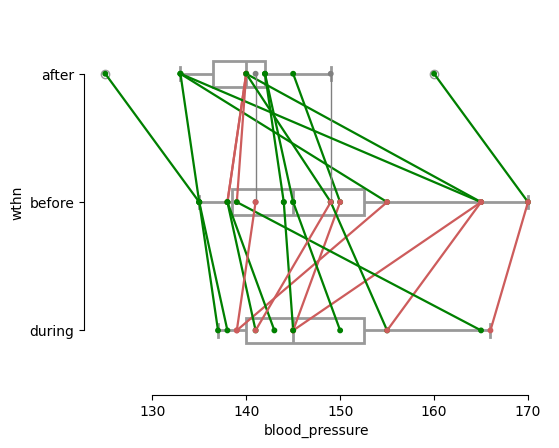

In [333]:
pd.set_option('future.no_silent_downcasting', True)

plt.figure(figsize=(6, 5))

# Create the paired plot
pg.plot_paired(
    data=data_rmanova_long,
    dv='blood_pressure',
    within='time',
    subject='case',
    boxplot=True,
    orient='h',
    # boxplot_in_front=False,  # fix submitted via a PR
    boxplot_kwargs={'color': 'white', 'linewidth': 2, 'zorder': 1},
)

sns.despine(trim=True);  # not default in Pingouin anymore

The following table provides a structured overview of the calculations and components involved in rmANOVA, making it easier to understand and interpret the results:

| Source of Variation  | Degrees of freedom                | Sum of squares | Mean square                                | F-ratio                                  |
|:-------------------- |:--------------------------------- |:---------------|------------------------------------------- |----------------------------------------- |
| Treatment/Time point | $\text{DF}_\text{B} = r - 1$      | SSB            | MS<sub>effect</sub> = SSB / DF<sub>B</sub> | MS<sub>effect</sub> / MS<sub>error</sub> |
| Subjects             | $\text{DF}_\text{S} = n - 1$      | SSS            |                                            |                                          |
| Residuals (error)    | $\text{DF}_\text{W} = (n-1)(r-1)$ | SSW            | MS<sub>error</sub> = SSW / DF<sub>W</sub>  |                                          |
| **Total**            | $\text{DF}_\text{T} = nr - 1$     | SST            |                                            |                                          |

By manually calculating these values, we gain a deeper understanding of the underlying calculations and how the ANOVA table is constructed.

In [334]:
# Parameters of the analysis
r = len(data_rmanova_long['time'].unique())  # Number of repeated measurements (time points)
n = len(data_rmanova_long['case'].unique())  # Number of subjects
DF_effect = r - 1             # Degrees of freedom for the effect
DF_subjects = n - 1           # Degrees of freedom for subjects
DF_error = (n - 1) * (r - 1)  # Degrees of freedom for error

print(f"There are {r} repeated measurements and {n} subjects")
print(f"This leads to {DF_effect}, {DF_subjects}, and {DF_error} degrees of freedom for the effect, subjects, and error, respectively")

There are 3 repeated measurements and 15 subjects
This leads to 2, 14, and 28 degrees of freedom for the effect, subjects, and error, respectively


In [335]:
# Calculate the overall mean of 'blood_pressure'
grand_mean = data_rmanova_long['blood_pressure'].mean()
print(f"Grand mean = {grand_mean:.2f}")

# Sums of squares
# SST (total sum of squares)
SST = ((data_rmanova_long['blood_pressure'] - grand_mean)**2).sum()

# SSS (sum of squares for subjects)
SSS = (
    data_rmanova_long.groupby('case')['blood_pressure']
  .apply(lambda x: (x.count()) * ((x.mean() - grand_mean)**2))
).sum()

# SSB (sum of squares between groups)
SSB = (
    data_rmanova_long.groupby(['case', 'time'])['blood_pressure']
    .mean()  # Calculate the mean for each Subject-Time combination
    .groupby('time')  # Group by Time and calculate SSB
    .apply(lambda x: x.count() * (x.mean() - grand_mean)**2)
).sum()

# SSW (sum of squares within subjects)
SSW = SST - SSS - SSB

print(f"With SST = {SST:.3f}, SSW = {SSW:.3f}, and SSB = {SSB:.3f}, we obtain SSS = {SSS:.1f}")

Grand mean = 145.00
With SST = 4452.000, SSW = 1351.733, and SSB = 524.933, we obtain SSS = 2575.3


In [336]:
# Calculate Mean Squares
MS_effect = SSB / DF_effect
MS_error = SSW / DF_error

print(f"MS for effect = {MS_effect:.4f}, and for error = {MS_error:.4f}")

MS for effect = 262.4667, and for error = 48.2762


In [337]:
# Calculate F-ratio and associated p-value
f_ratio = MS_effect / MS_error  # Use the appropriate mean squares
p_value = f.sf(f_ratio, DF_effect, DF_error)  # Use the correct degrees of freedom

print(f"Finally, with an F ratio = {f_ratio:.4f}, the associated P value = {p_value:.5f}")

Finally, with an F ratio = 5.4368, the associated P value = 0.01012


We've explored the key components of repeated measures analysis of variance: sums of squares (SST, SSB, SSS, SSW), degrees of freedom, and mean squares (MS<sub>effect</sub>, MS<sub>subjects</sub>, MS<sub>error</sub>). These elements come together in a structured way within the rmANOVA table. This table provides a framework for comparing a model that assumes no difference between the repeated measurements (our null hypothesis) to a model that allows for differences.

Here's the rmANOVA table we constructed for our example analyzing the effect of time on blood pressure:

| Source of variation | Sum of squares | DF | MS     | F-ratio | P value |
|---------------------|----------------|----|--------|---------|---------|
| Effect/Time         | 524.93         | 2  | 262.47 | 5.4368  | 0.01012 |
| Subjects            | 2575.3         | 14 |        |         |         |
| Error               | 1351.73        | 28 | 48.276 |         |         |
| Total               | 4452           | 44 |        |         |         |

The table partitions the total variation (SST) into the variation explained by differences between the time points (SSB or SS<sub>effect</sub>), the variation between subjects (SSS or SS<sub>subjects</sub>), and the unexplained variation within subjects (SSW or SS<sub>error</sub>). The degrees of freedom (DF) are shown for each source of variation. The mean squares (MS) are calculated by dividing the sum of squares by the corresponding degrees of freedom. The F-ratio, calculated as MS<sub>effect</sub> / MS<sub>error</sub>, compares the explained and unexplained variation, adjusted for their degrees of freedom. Finally, the P value helps us determine the statistical significance of the F-ratio.

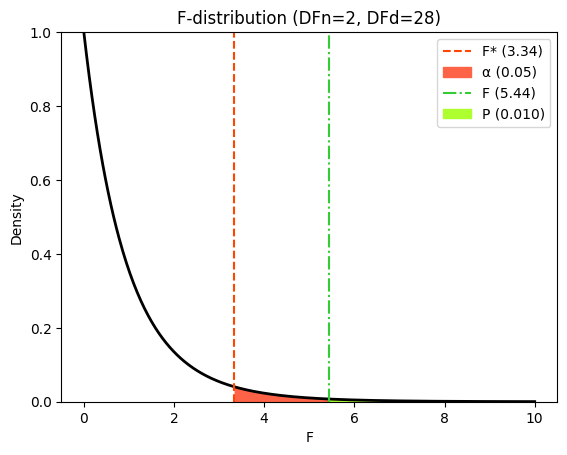

In [338]:
# Significance level (alpha)
alpha = 0.05

# Calculate critical F-value
f_crit = f(dfn=DF_effect, dfd=DF_error).ppf(1 - alpha)

# Generate x values for plotting
x_f = np.linspace(0, 10, 500)  # Adjusted range for better visualization
hx_f = f.pdf(x_f, DF_effect, DF_error)

# Create the plot
plt.plot(x_f, hx_f, lw=2, color='black')

# Critical value
plt.axvline(
    x=f_crit,
    color='orangered',
    linestyle='--',
    label=f"F* ({f_crit:.2f})")

# Alpha area
plt.fill_between(
    x_f[x_f >= f_crit],
    hx_f[x_f >= f_crit],
    color='tomato',
    label=f"α ({alpha})")

# F-statistic
plt.axvline(
    x=f_ratio,
    color='limegreen',
    linestyle='-.',
    label=f"F ({f_ratio:.2f})")

# P value area
plt.fill_between(
    x_f[x_f >= f_ratio],
    hx_f[x_f >= f_ratio],
    color='greenyellow',
    label=f"P ({p_value:.3f})")

plt.xlabel("F")
plt.ylabel('Density')
plt.title(f"F-distribution (DFn={DF_effect}, DFd={DF_error})")
plt.margins(x=0.05, y=0)
plt.legend();

If the null hypothesis were true (i.e., if there were no differences between the means of the blood pressure measurements at different time points), we would expect the MS<sub>effect</sub> and MS<sub>error</sub> values to be similar, resulting in an F-ratio close to 1.0. However, in our example, the F-ratio is 5.437, suggesting that the differences between time points explain significantly more variation than would be expected by chance. This small P value (0.010) provides strong evidence against the null hypothesis, leading us to conclude that there are significant differences in blood pressure between at least two of the time points.

### Repeated measures ANOVA using Python


Now that we have a better understanding of the underlying principles of rmANOVA, we'll explore how to conduct this analysis using Python. We'll leverage two powerful libraries, Pingouin and statsmodels, to perform the calculations and interpret the results.

We'll use the [`rm_anova` function in Pingouin](https://pingouin-stats.org/build/html/generated/pingouin.rm_anova.html) and the [`AnovaRM` function in statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html) to streamline the analysis.

#### rmANOVA using Pingouin

Before we start the rmANOVA analysis, we should check some important assumptions:

* Normality: rmANOVA assumes that the residuals (the differences between the observed values and the predicted values) are normally distributed.
* Homoscedasticity: rmANOVA assumes that the variances of the differences between all pairs of within-subjects conditions are equal.

We've discussed these assumptions in the context of standard ANOVA, and they apply to rmANOVA as well.

Another important assumption in rmANOVA is **sphericity**. This assumption states that the variances of the differences between all possible pairs of within-subjects conditions are equal. We can test this assumption using Mauchly's test of sphericity.

Violation of the sphericity assumption can lead to an inflated Type I error rate (false positives) and an invalid F-value. If the P value from Mauchly's test exceeds 0.05, we can conclude that the data meets the assumption of sphericity.

In [339]:
# Test for sphericity
spher_results = pg.sphericity(
    dv='blood_pressure',
    within='time',
    subject='case',
    data=data_rmanova_long
)

# Print the sphericity test results
print(spher_results)

SpherResults(spher=True, W=0.8533042981018584, chi2=2.0623077334263207, dof=2, pval=0.35659525969062833)


In our example, the sphericity assumption is met, as indicated by a Mauchly's W value of 0.853, a χ² statistic of 2.06, and a P value of 0.357, which is significantly greater than 0.05. This means we can proceed with the rmANOVA analysis without concerns about violating the sphericity assumption.

However, it's worth noting that in situations where the sphericity assumption is violated, corrections like the Greenhouse-Geisser or Huynh-Feldt correction can be applied. These corrections adjust the degrees of freedom to account for the violation of sphericity and provide a more accurate p-value.

In [340]:
# Perform rmANOVA with automatic sphericity correction
aov_rm = pg.rm_anova(
    dv='blood_pressure',
    within='time',
    subject='case',
    data=data_rmanova_long,
    detailed=True,
    effsize="ng2",  # Use generalized eta-squared as effect size
    correction='auto'  # Automatically apply sphericity correction if needed
)

print(aov_rm.round(4))

  Source         SS  DF        MS       F   p-unc     ng2     eps
0   time   524.9333   2  262.4667  5.4368  0.0101  0.1179  0.8721
1  Error  1351.7333  28   48.2762     NaN     NaN     NaN     NaN


The results indicate a statistically significant effect of 'time' on 'blood_pressure' with $F(2, 28) = 5.4368$, $P = 0.0101$, and $\eta^2_g = 0.1179$. This means that there is a significant difference in the 'blood_pressure' ratings across the different 'time' points. The generalized eta-squared value of 0.1179 suggests that approximately 11.8% of the variance in 'blood_pressure' is explained by the 'time' factor.

#### Repeated measures ANOVA using statsmodels

We can also perform repeated measures ANOVA (rmANOVA) using the statsmodels library, which offers more flexibility for specifying and fitting different ANOVA models, especially for complex designs.

We cannot directly use OLS for rmANOVA because it doesn't account for the within-subject correlations that are inherent in repeated measures designs. Using `ols` would be like treating the repeated measurements as independent observations, which would violate the assumptions of the model and lead to inaccurate results. Therefore, for rmANOVA, it's more appropriate to use specialized functions or classes like `AnovaRM` in statsmodels or `rm_anova` in Pingouin. These functions are specifically designed to handle the within-subject correlations and provide accurate results for repeated measures designs.

In [341]:
from statsmodels.stats.anova import AnovaRM

# Perform rmANOVA using AnovaRM
model_anova_rm_statsmodels = AnovaRM(
    data=data_rmanova_long,
    depvar='blood_pressure',
    subject='case',
    within=['time']
)

# results_anova_rm_statsmodels = model_anova_rm_statsmodels.fit()

# # Print the ANOVA table
# print(results_anova_rm_statsmodels.anova_table)
print(model_anova_rm_statsmodels.fit())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
time  5.4368 2.0000 28.0000 0.0101



## Non-parametric methods

In previous chapters, we explored non-parametric alternatives to t-tests and correlation analysis. Similarly, when the assumptions of ANOVA (or rmANOVA) are not met, such as normality or homogeneity of variances, we can turn to **non-parametric methods**. These methods offer more flexibility and are less sensitive to the underlying distribution of the data.

We'll focus on how to perform these tests in Python using the SciPy and Pingouin libraries and interpret the results. While we won't delve into the mathematical details of these tests to keep the chapter concise, we'll highlight their key advantages and limitations.

### Kruskal-Wallis test

The Kruskal-Wallis test is a non-parametric alternative to the *one-way ANOVA*. It is used to compare the **medians** of three or more groups when the assumptions of ANOVA, such as normality and homogeneity of variances, are not met.

Here's how the Kruskal-Wallis test works:

1. *Rank the data*: all the data points from all groups are combined and ranked from lowest to highest, regardless of their group membership.
2. *Calculate the rank sum for each group*: the ranks of the data points within each group are summed to obtain the rank sum for that group.
3. *Calculate the test statistic (H)*: the H statistic is calculated based on the rank sums and the sample sizes of the groups. It measures the variability between the rank sums, indicating how different the group medians are.
4. *Determine the P value*: the P value is calculated using the chi-squared distribution with degrees of freedom equal to the number of groups minus 1. It represents the probability of obtaining an H statistic as extreme as the one calculated, assuming that the null hypothesis is true (i.e., all group medians are equal).

#### Kruskal-Wallis test using Pingouin

We can perform the Kruskal-Wallis test using the Pingouin library, which offers a [dedicated function called `kruskal`](https://pingouin-stats.org/build/html/generated/pingouin.kruskal.html). This function provides a more user-friendly interface and returns a comprehensive output that includes the test statistic, P value, and degrees of freedom.

In [342]:
# Perform the Kruskal-Wallis test using Pingouin
print(pg.kruskal(data=data_anova, dv='Pain threshold', between='Hair color'))

             Source  ddof1         H     p-unc
Kruskal  Hair color      3  10.58863  0.014172


The Kruskal-Wallis H statistic measures the overall difference between the group medians. A larger H statistic indicates a greater difference between the groups. In this case, H = 10.58863. Since the P value (0.014172) is less than the conventional significance level of 0.05, we reject the null hypothesis. This means that there is a statistically significant difference between the medians of at least two of the hair color groups in terms of their pain thresholds.

The Kruskal-Wallis test does not rely on the assumption of normality or homogeneity of variances, making it more robust for data that does not meet these assumptions. It can be used for *ordinal data*, where the data points represent ranks or ordered categories. But it can also be used with *small sample sizes*, like in the current example, where the normality assumption is generally difficult to assess.

However, it may be less powerful than ANOVA when the normality and homoscedasticity assumptions are met. It only tests for differences between medians, not means, and while it doesn't assume normality, it still assumes that the groups have *similar shapes of distributions*.

#### Kruskal-Wallis test using SciPy

We can also use the `scipy.stats` module to easily compute the [Kruskal-Wallis test statistic and its associated P value](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html). This function is easy to use and provides a straightforward way to perform the test.

In [343]:
from scipy.stats import kruskal

# Perform one-way ANOVA using scipy.stats
hair_colors = data_anova['Hair color'].unique()
groups = [
    data_anova['Pain threshold'][data_anova['Hair color'] == color] for color in hair_colors
]

# Perform the Kruskal-Wallis test
kruskal(*groups)

KruskalResult(statistic=10.588630377524153, pvalue=0.014171563303136805)

### Friedman's test

Friedman's test is a non-parametric alternative to repeated measures one-way ANOVA. It is used to compare the medians of three or more repeated measurements within subjects when the assumptions of rmANOVA, such as normality and sphericity, are not met. Here is how Friedman's test works:

1.  *Rank the data*: for each subject, the repeated measurements are ranked from lowest to highest.
2.  *Calculate the rank sum for each group*: the ranks for each within-subject condition (e.g., time point, treatment) are summed across all subjects.
3.  *Calculate the test statistic (Q)*: the Q statistic is calculated based on the rank sums and the sample sizes. It measures the variability between the rank sums, indicating how different the group medians are.
4.  *Determine the P value*: the P value is calculated using the chi-squared distribution with degrees of freedom equal to the number of within-subject conditions minus 1. It represents the probability of obtaining a Q statistic as extreme as the one calculated, assuming that the null hypothesis is true (i.e., all group medians are equal).


Like the Kruskal-Wallis test, Friedman's test does not rely on the assumption of normality or sphericity, making it more robust for data that does not meet these assumptions. It can be also used for *ordinal data*, where the data points represent ranks or ordered categories, and it can be used with *small sample sizes*, where the normality assumption is difficult to assess.

Just like the Kruskal-Wallis test, the Friedman's test has some limitations. It may be less powerful than rmANOVA when the normality and sphericity assumptions are met. Furtheremoire, it only tests for differences between medians, not means. And while it doesn't assume normality, it still assumes that the distributions of the within-subject conditions have similar shapes.

#### Friedman's test using Pingouin

We can also perform Friedman's test using [Pingouin's `friedman` function](https://pingouin-stats.org/build/html/generated/pingouin.friedman.html), just as easily as we did for the Kruskal-Wallis test, rmANOVA, and standard ANOVA.

In [344]:
# Perform Friedman's test
print(
    pg.friedman(
        data=data_rmanova_long,
        dv='blood_pressure',
        within='time',
        subject='case'
    )
)

         Source         W  ddof1         Q     p-unc
Friedman   time  0.330994      2  9.929825  0.006979


The Friedman test typically uses a Q statistic, which asymptotically follows a chi-squared distribution, for hypothesis testing. However, the chi-squared test can be overly conservative for small sample sizes and repeated measures. As an alternative, we can use an F test, which has better properties for smaller samples and behaves like a permutation test with lower computational cost.

In [345]:
# Perform Friedman's test with F-test
print(
    pg.friedman(
        data=data_rmanova_long,
        dv='blood_pressure',
        within='time',
        subject='case',
        method='f'  # Use the F-test
    )
)

         Source         W     ddof1      ddof2         F     p-unc
Friedman   time  0.330994  1.866667  26.133333  6.926573  0.004503


Using both the chi-squared and F-test methods in the Friedman test, we find that the P value is far below 0.01. This confirms that there is a statistically significant difference between the medians of at least two of the repeated measurements.

#### Friedman's test using SciPy

Finally, we can use the `scipy.stats` module to obtain the [results and P value from Friedman's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html).

In [346]:
from scipy.stats import friedmanchisquare

# Extract the data for each time point
before = data_rmanova['before']
during = data_rmanova['during']
after = data_rmanova['after']

# Perform Friedman's test
friedmanchisquare(before, during, after)

FriedmanchisquareResult(statistic=9.929824561403514, pvalue=0.00697856283688688)

## Two-way ANOVA

### Example of two-way ANOVA

**Two-way ANOVA** is a statistical technique used to analyze the effects of two independent variables on a dependent variable. It's also known as two-factor ANOVA.

In a two-way ANOVA, the data are divided into two ways because each data point is classified according to two factors. For example, imagine a study where participants are randomly assigned to two different treatment groups (active or inactive) and then measured at two different time points (short duration or long duration). In this case, each data point would be categorized by both the treatment group and the time point.

Two-way ANOVA simultaneously tests three null hypotheses:

1.  *No interaction between the two factors*: this means that the effect of one factor (e.g., treatment) is the same across all levels of the other factor (e.g., duration). In other words, there is no interaction between treatment and duration.
2.  *No main effect of the first factor*: this means that the population means are identical across all levels of the first factor (e.g., treatment), regardless of the level of the second factor (e.g., duration).
3.  *No main effect of the second factor*: this means that the population means are identical across all levels of the second factor (e.g., duration), regardless of the level of the first factor (e.g., treatment).

In this section, we'll delve into the manual calculation of two-way ANOVA using another Pingouin's dataset, exploring the impact of different fertilizer formulations on crop yields. [As detailed elsewhere](https://real-statistics.com/two-way-anova/two-factor-anova-with-replication/), the study investigates a new fertilizer designed to increase crop yields. The makers of the fertilizer want to identify the most effective formulation ('Blend') for various 'Crop', including wheat, corn, soybeans, and rice. They test two different blends on a sample of five plots for each of the four crop types.

Our goal is to manually calculate the two-way ANOVA to understand the effects of the fertilizer blend and crop type on the yield, as well as their potential interaction. This hands-on approach will provide a deeper understanding of the underlying calculations and principles of two-way ANOVA.

In [347]:
# Load the 'anova2' dataset
data_two_way_anova = pg.read_dataset('anova2')

# Display a sample of the DataFrame
data_two_way_anova.sample(7)

,Ss,Blend,Crop,Yield
12,13,Blend Y,Wheat,135
8,9,Blend X,Soy,166
6,7,Blend X,Corn,174
14,15,Blend Y,Wheat,176
22,23,Blend Y,Soy,159
17,18,Blend Y,Corn,132
21,22,Blend Y,Soy,145


The data is currently in long format, but we can also represent it in a different way using `unstack`.

In [348]:
data_two_way_anova.set_index(['Crop', 'Blend', 'Ss']).unstack(0)  ## 'Ss' is the unique identifier

Yield              
Crop         Corn    Soy  Wheat
Blend   Ss                     
Blend X 1     NaN    NaN  123.0
        2     NaN    NaN  156.0
        3     NaN    NaN  112.0
        4     NaN    NaN  100.0
        5   128.0    NaN    NaN
        6   150.0    NaN    NaN
        7   174.0    NaN    NaN
        8   116.0    NaN    NaN
        9     NaN  166.0    NaN
        10    NaN  178.0    NaN
        11    NaN  187.0    NaN
        12    NaN  153.0    NaN
Blend Y 13    NaN    NaN  135.0
        14    NaN    NaN  130.0
        15    NaN    NaN  176.0
        16    NaN    NaN  120.0
        17  175.0    NaN    NaN
        18  132.0    NaN    NaN
        19  120.0    NaN    NaN
        20  187.0    NaN    NaN
        21    NaN  140.0    NaN
        22    NaN  145.0    NaN
        23    NaN  159.0    NaN
        24    NaN  131.0    NaN

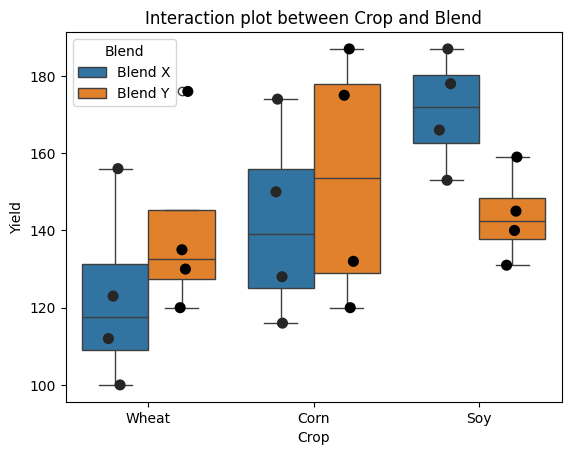

In [349]:
# Create the boxplot
sns.boxplot(
    x='Crop',
    y='Yield',
    data=data_two_way_anova,
    hue='Blend',
)

# Overlay the stripplot
sns.stripplot(
    x='Crop', y='Yield', data=data_two_way_anova,
    hue='Blend', dodge=True,  # Separate points for each 'Blend' within 'Crop'
    palette='dark:black', size=8, legend=False)

plt.title('Interaction plot between Crop and Blend');

### How two-way ANOVA works

Two-way ANOVA involves partitioning the total variation in the dependent variable into four components:

1.  **Interaction effect $\text{SS}_\text{AXB}$:** this component measures the extent to which the effect of one factor depends on the level of the other factor.
2.  **Between-rows variation $\text{SS}_\text{A}$:** this component measures the variation between the different levels of the *first factor* (e.g., the difference between the mean scores of the active and inactive treatment groups).
3.  **Between-columns variation $\text{SS}_\text{B}$:** this component measures the variation between the different levels of the *second factor* (e.g., the difference between the mean scores for the short and long duration groups).
4.  **Residuals or within-cells variation SSW or $\text{SS}_\text{within}$:** this component measures the variation within each cell of the design (i.e., within each combination of the two factors).

The total variation **SST** or SS<subs>total</sub> is calculated as the sum of these four components:

$$
\text{SS}_\text{total} = \text{SS}_\text{A} + \text{SS}_\text{B} + \text{SS}_{\text{A} \times \text{B}} + \text{SS}_\text{within}
$$

Similar to repeated measures ANOVA, the formulas for SSA, SSB, SSAB, and SSW in two-way ANOVA are more complex than in standard one-way ANOVA. They need to account for the effects of both factors and their interaction. We won't delve into the exact formulas here, as they can be quite involved.

However, we can still compute the total sum of squares (SST) using the universal formula:

$$
\text{SS}_\text{total} = \sum_k \sum_j \sum_i (x_{ijk} - \overline{x})^2
$$

where:

- $x_{ijk}$ is the individual data point for the $k$ th observation in the $j$ th level of Factor B and the $i$ th level of Factor A.
- $\bar{x}$ is the grand mean of all the data.


Then, the sum of squares for the first factor / factor A can be writen as:

$$
\text{SS}_\text{A} =  m \times c \sum_i (\overline{x}_{i} - \overline{x})^2
$$

where:

- $m$ is the number of observations per cell (assuming equal cell sizes).
- $c$ is the number of levels of Factor B, or *columns* in a $r \times c$ structure table.
- $\overline{x}_{i}$ is the mean of the $i$ th level of Factor A, across all levels of Factor B, i.e., the mean of $\{x_{ijk}: 1 \le j \le c, 1 \le k \le m\}$.

_Important note - If the sample sizes $m$ for the different combinations of factors (cells) are unequal, we have an **unbalanced design**. In such cases, the traditional approach for calculating sums of squares might not be appropriate. Instead, we can use a regression-based approach, e.g., using statsmodels, to perform the two-way ANOVA, as [described elsewhere](https://real-statistics.com/multiple-regression/anova-using-regression/). This approach is more flexible and can handle unbalanced designs effectively. Pingouin can take care of unbalanced designs and will automatically analyze the data via statsmodels (discussed later in the chapter)._

Similarly, the sum of squares for the second factor / factor B equals:

$$
\text{SS}_\text{B} = m \times r \sum_j (\overline{x}_{j} - \overline{x})^2
$$

where:

- $r$ is the number of levels of Factor A, or *rows* in a $r \times c$ structure table.
- $\overline{x}_{j}$ is the mean of the $j$ th level of Factor B, across all levels of Factor A, i.e., the mean of $\{x_{ijk}: 1 \le j \le r, 1 \le k \le m\}$.

Finally, the sum of squares for the *interaction* equals:

$$
\text{SS}_\text{AxB} = m \sum_j \sum_i (\overline{x}_{ij} - \overline{x}_{i} - \overline{x}_{j} + \overline{x})^2
$$

where:

- $\overline{x}_{ij}$ is the mean of the cell corresponding to the $i$ th level of Factor A and the $j$ th level of Factor B.

The formula of the sum of squares error (SSW, SS<sub>within</sub> or SS<sub>error</sub>) is:

$$
\text{SS}_\text{W} = \sum_k \sum_j \sum_i (x_{ijk} - \overline{x}_{ij})^2
$$

This partitioning allows us to calculate it by subtracting all the effect sums of squares from SST, as we demonstrated in the previous calculations.

### Manual calculation of two-way ANOVA

To test the null hypotheses, we calculate the F-ratio for each effect by dividing the mean square (SS divided by degrees of freedom) for the *effect* by the mean square for the *within-cells* variation. The F-ratio represents the ratio of the explained variance to the unexplained variance. The associated P value indicates the probability of obtaining an F-ratio as extreme or more extreme than the one observed, assuming the null hypothesis is true.

The table below outlines the partitioning of variance in a two-way ANOVA, including the main effects of each factor, their interaction, and the within-cell error. It also shows the corresponding degrees of freedom, mean squares, and F-ratios used to test the significance of each effect.

| Source of variation    | Sum of squares   | Degrees of freedom                  | Mean square                                            | F-ratio                           |
|:---------------------- |:---------------- |:----------------------------------- |:------------------------------------------------------ |:--------------------------------- |
| Factor A (e.g., Crop)  | SS<sub>A</sub>   | $\text{DF}_\text{A} = r - 1$        | MS<sub>A</sub> = SS<sub>A</sub> / DF<sub>A</sub>       | MS<sub>A</sub> / MS<sub>W</sub>   |
| Factor B (e.g., Blend) | SS<sub>B</sub>   | $\text{DF}_\text{B} = c - 1$        | MS<sub>B</sub> = SS<sub>B</sub> / DF<sub>B</sub>       | MS<sub>B</sub> / MS<sub>W</sub>   |
| Interaction (AxB)      | SS<sub>AxB</sub> | $\text{DF}_\text{AxB} = (r-1)(c-1)$ | MS<sub>AxB</sub> = SS<sub>AxB</sub> / DF<sub>AxB</sub> | MS<sub>AxB</sub> / MS<sub>W</sub> |
| Within (Error)         | SSW              | $\text{DF}_\text{W} = n - rc$       | MS<sub>W</sub> = SSW / DF<sub>W</sub>                  |                                   |
| **Total**              | SST              | $\text{DF}_\text{T} = n - 1$        |                                                        |                                   |

**Where:**

- $r$ is the number of levels of Factor A
- $c$ is the number of levels of Factor B
- $m$ is the number of observations per cell (assuming equal cell sizes)
- $n$ is the total number of observations, i.e., $n = m \times r \times c$

To calculate the sums of squares for the two-way ANOVA, we first need to compute some key components:

* The grand mean of the 'Yield' variable.
* The mean 'Yield' for each level of the 'Crop' factor (across all levels of 'Blend').
* The mean 'Yield' for each level of the 'Blend' factor (across all levels of 'Crop').
* The mean 'Yield' for each combination of 'Crop' and 'Blend' (i.e., each cell in the design).
* The number of observations per cell.
* The number of levels of the 'Crop' factor.
* The number of levels of the 'Blend' factor.

We can easily calculate these components directly from the DataFrame using pandas functions, i.e., through the `groupby` method.

In [350]:
# Calculate the grand mean of 'Yield'
grand_mean_two_way_anova = data_two_way_anova['Yield'].mean()
print(f"Grand mean for the two-way ANOVA = {grand_mean_two_way_anova:.2f}")

# Calculate the number of observations per cell using pivot_table
n_cell = data_two_way_anova.pivot_table(index='Crop', columns='Blend', values='Yield', aggfunc='count')
print("\nNumber of observations per cell:")
print(n_cell)

# Store the number of observations per cell
n_cells = int(n_cell.mean(axis=None)) # type: ignore

print(f"\nNumber of observations per cell: m = {n_cells}")

Grand mean for the two-way ANOVA = 145.54

Number of observations per cell:
Blend  Blend X  Blend Y
Crop                   
Corn         4        4
Soy          4        4
Wheat        4        4

Number of observations per cell: m = 4


To calculate the sum of squares for the 'Crop' factor SS<sub>A</sub>, we'll use the formula for the main effect of Factor A in two-way ANOVA. This formula calculates the *weighted sum* of squared deviations of each *crop's mean* 'Yield' from the *grand mean*, where the weights are the number of observations for each crop, as determined in the previous snippet.

In [351]:
# Calculate mean and count of Yield for each Crop
data_two_way_anova_crop = data_two_way_anova.groupby('Crop')['Yield'].agg(['mean', 'count'])
print("Summary statistics for Yield by Crop:")
print(data_two_way_anova_crop.round(2))

# Calculate SSB for Crop
n_crop = data_two_way_anova.groupby('Crop')['Yield'].count().mean()  # Mean count per crop
SS_crop = sum(count * (mean - grand_mean_two_way_anova)**2 for mean, count in data_two_way_anova_crop.values)
# SS_crop = 8 * (147.75 - 145.54)**2 + 8 * (157.375 - 145.54)**2 + 8 * (131.5 - 145.54)**2
print(f"\nSS for Crop: SSA = {SS_crop:.3f}")

# Number of levels and degrees of freedom for Crop factor
n_levels_crop = data_two_way_anova['Crop'].nunique()
DF_crop = n_levels_crop - 1
print(f"\nNumber of levels for Crop factor: r = {n_levels_crop}")
print(f"Degrees of freedom for Crop factor: DFA = {DF_crop}")

Summary statistics for Yield by Crop:
         mean  count
Crop                
Corn   147.75      8
Soy    157.38      8
Wheat  131.50      8

SS for Crop: SSA = 2736.583

Number of levels for Crop factor: r = 3
Degrees of freedom for Crop factor: DFA = 2


Similarly, to calculate the sum of squares for the 'Blend' factor SS<sub>B</sub>, we'll use the formula for the main effect of Factor B in two-way ANOVA. This formula is similar to the one for SS<sub>A</sub>, but it calculates the *weighted sum* of squared deviations of each *blend's mean* 'Yield' from the grand mean, where the weights are the number of observations for each blend.

In [352]:
# Calculate mean and count of Yield for each Blend
data_two_way_anova_blend = data_two_way_anova.groupby('Blend')['Yield'].agg(['mean', 'count'])
print("\nSummary statistics for Yield by Blend:")
print(data_two_way_anova_blend.round(2))

# Calculate SSB for Blend
n_blend = data_two_way_anova.groupby('Blend')['Yield'].count().mean()  # Mean count per blend
SS_blend = sum(count * (mean - grand_mean_two_way_anova)**2 for mean, count in data_two_way_anova_blend.values)
# SS_blend = 12 * (145.25 - 145.54)**2 + 12 * (145.83 - 145.54)**2
print(f"\nSS for Blend: SSB = {SS_blend:.3f}")

# Number of levels and degrees of freedom for Blend factor
n_levels_blend = data_two_way_anova['Blend'].nunique()
DF_blend = n_levels_blend - 1
print(f"\nNumber of levels for Blend factor: c = {n_levels_blend}")
print(f"Degrees of freedom for Blend factor: DFB = {DF_blend}")


Summary statistics for Yield by Blend:
           mean  count
Blend                 
Blend X  145.25     12
Blend Y  145.83     12

SS for Blend: SSB = 2.042

Number of levels for Blend factor: c = 2
Degrees of freedom for Blend factor: DFB = 1


Finally, to calculate the sum of squares for the interaction between 'Crop' and 'Blend' SS<sub>AxB</sub>, we'll use the formula for the interaction effect in two-way ANOVA. This formula calculates the *weighted sum* of squared deviations of *each cell's mean* 'Yield' from what would be expected if there were no interaction between the two factors.

In [353]:
# Calculate the mean 'Yield' for each combination of 'Crop' and 'Blend'
cell_means = data_two_way_anova.groupby(['Crop', 'Blend'])['Yield'].mean()

# Calculate the sum of squares for the interaction (SSAB)
# Initialize the sum of squares for the interaction (SSAB)
SS_interaction = 0

# Loop through each unique value of 'Crop'
for crop in data_two_way_anova['Crop'].unique():
    # Loop through each unique value of 'Blend'
    for blend in data_two_way_anova['Blend'].unique():
        # Get the mean 'Yield' for the current combination of 'Crop' and 'Blend'
        mean_crop_blend = cell_means.loc[(crop, blend)]
        # Get the mean 'Yield' for the current 'Crop'
        mean_crop = data_two_way_anova_crop.loc[crop, 'mean']
        # Get the mean 'Yield' for the current 'Blend'
        mean_blend = data_two_way_anova_blend.loc[blend, 'mean']
        # Add the weighted squared deviation to SS_interaction
        SS_interaction += n_cells * (mean_crop_blend - mean_crop - mean_blend + grand_mean_two_way_anova)**2

print(f"SS for interaction: SSAxB = {SS_interaction:.3f}")

# Degrees of freedom for interaction
DF_interaction = DF_crop *DF_blend
print(f"\nDegrees of freedom for interaction: DFAxB = {DF_interaction}")

SS for interaction: SSAxB = 2360.083

Degrees of freedom for interaction: DFAxB = 2


To calculate the total sum of squares (SST), we'll use the same universal formula that applies to one-way ANOVA and repeated measures ANOVA. This formula calculates the sum of squared deviations of *each data point* from the *grand mean*.

In [354]:
# SST (total sum of squares)
SST_anova2 = ((data_two_way_anova['Yield'] - grand_mean_two_way_anova)**2).sum()
print(f"SST = {SST_anova2:.3f}")

# Total number of samples and degrees of freedom for total variation
n_total_anova2 = n_cells * n_levels_crop * n_levels_blend
# n_total = len(data_two_way_anova)
DF_total_anova2 = n_total_anova2 - 1
print(f"\nTotal number of samples: n = {n_total_anova2}")
print(f"Degrees of freedom for total variation: DFT = {DF_total_anova2}")

SST = 14851.958

Total number of samples: n = 24
Degrees of freedom for total variation: DFT = 23


We can calculate SSE by summing the squared differences between each data point and its corresponding *cell mean*.

In [355]:
# Calculate SSE from scratch
SSE_anova2 = (
    data_two_way_anova                   # Start with the DataFrame
    .groupby(['Crop', 'Blend'])          # Group the data by 'Crop' and 'Blend'
    .Yield                               # Select the 'Yield' column, equivalent to `['Yield]`
    .apply(lambda x: (x - x.mean())**2)  # Calculate squared deviations from the group mean
    .sum()                               # Sum the squared deviations to get SSE
)

print(f"SSE calculated from scratch = {SSE_anova2:.3f}")

# Degrees of freedom for error/residuals
DF_within_anova2 = n_total_anova2 - n_levels_crop * n_levels_blend
print(f"\nDegrees of freedom for error/residuals: DFW = {DF_within_anova2}")

SSE calculated from scratch = 9753.250

Degrees of freedom for error/residuals: DFW = 18


We can also calculate SSE by subtracting the sum of squares for the other factors (SSA, SSB, and SSAxB) from the total sum of squares (SST).

In [356]:
# Calculate SSE by subtracting other SS from SST
SSE_substraction_anova2 = SST_anova2 - SS_crop - SS_blend - SS_interaction
print(f"SSE calculated by subtraction = {SSE_substraction_anova2:.3f}")

# Degrees of freedom for error from substraction
DF_within_substraction_anova2 = DF_total_anova2 - DF_blend - DF_crop - DF_interaction
print(f"\nDegrees of freedom for error (from substraction): DFW = {DF_within_substraction_anova2}")

SSE calculated by subtraction = 9753.250

Degrees of freedom for error (from substraction): DFW = 18


We now have all the values necessary to calculate the mean squares and F-ratios.

In [357]:
# Calculate mean squares
MS_crop = SS_crop / DF_crop
MS_blend = SS_blend / DF_blend
MS_interaction = SS_interaction / DF_interaction
MS_within_anova2 = SSE_anova2 / DF_within_anova2

# Calculate F-ratios
F_crop = MS_crop / MS_within_anova2
F_blend = MS_blend / MS_within_anova2
F_interaction = MS_interaction / MS_within_anova2

# Print the mean squares
print(f"MS for Crop = {MS_crop:.3f}")
print(f"MS for Blend = {MS_blend:.3f}")
print(f"MS for Interaction = {MS_interaction:.3f}")
print(f"MS error/within = {MS_within_anova2:.3f}")

# Print the F-ratios
print(f"\nF-ratio for Crop = {F_crop:.3f}")
print(f"F-ratio for Blend = {F_blend:.3f}")
print(f"F-ratio for interaction = {F_interaction:.3f}")

MS for Crop = 1368.292
MS for Blend = 2.042
MS for Interaction = 1180.042
MS error/within = 541.847

F-ratio for Crop = 2.525
F-ratio for Blend = 0.004
F-ratio for interaction = 2.178


We determine the P values for each factor and the interaction using the F-distribution, just as we did in one-way ANOVA.

In [358]:
# Calculate P values
p_value_crop        = f.sf(F_crop, DF_crop, DF_within)
p_value_blend       = f.sf(F_blend, DF_blend, DF_within)
p_value_interaction = f.sf(F_interaction, DF_interaction, DF_within)

# Print the P values
print(f"P value for Crop: {p_value_crop:.4f}")
print(f"P value for Blend: {p_value_blend:.4f}")
print(f"P value for interaction: {p_value_interaction:.4f}")

P value for Crop: 0.1134
P value for Blend: 0.9519
P value for interaction: 0.1478


We can now fill the ANOVA table as follows:

| Source of variation | SS        | DF | MS             | F-ratio | P values |
|:------------------- |:--------- |:-- |:-------------- |:------- |:-------- |
| Factor A - Crop     | 2736.583  | 2  | 1368.292       | 2.525   | 0.1080   |
| Factor B - Blend    | 2.042     | 1  | 2.042          | 0.004   | 0.9517   |
| Interaction         | 2360.083  | 2  | 1180.042       | 2.178   | 0.1422   |
| Error/Within        | 9753.250  | 18 | 541.847        |         |          |
| **Total**           | 14851.958 | 23 |                |         |          |

To interpret the results of a two-way ANOVA, we focus on the P values. If a P value is less than our significance level (typically 0.05), we reject the null hypothesis and conclude that there is a significant effect for the corresponding source of variation.

In this table, none of the P values are less than 0.05. This indicates that there are no statistically significant main effects of 'Crop' or 'Blend', nor a significant interaction effect between them. In other words, neither the type of crop nor the type of blend, nor their combination, has a significant impact on the yield.

In the case of an effective interaction between the two parameters, we would have observed non-parallel lines on the previous plot, indicating that the effect of one factor depends on the level of the other factor. This is because parallel lines suggest that the effect of one factor (e.g., 'Blend') is the same across all levels of the other factor (e.g., 'Crop'), implying *no interaction*. On the other hand, non-parallel lines, or lines that cross or diverge, suggest the presence of an interaction effect. This means that the effect of one factor depends on the level of the other factor.

While we calculated the sums of squares and mean squares, these values are not as informative in this case since the effects are not significant. However, it's worth noting that the largest sum of squares is associated with the 'Crop' factor, suggesting that there might be some differences between crops, although these differences are not statistically significant.

Overall, based on this two-way ANOVA analysis, we can conclude that neither the type of crop nor the type of blend, nor their interaction, has a significant effect on the yield.

### Visualizing F-ratios and P values in two-way ANOVA

We can gain a deeper understanding of the two-way ANOVA results by visualizing the F-distributions, critical values, F-ratios, and P values for each source of variation. This visualization will provide a clear picture of the statistical significance of each effect and the overall relationships between the factors and the dependent variable.

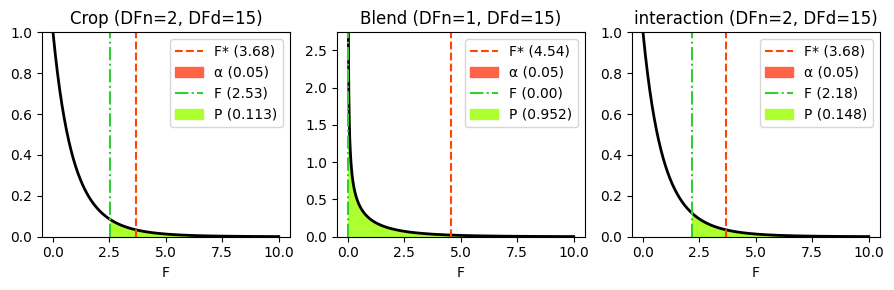

In [359]:
# Significance level (alpha)
α = 0.05

# Function to plot F-distribution with critical values and p-value
def plot_f_distribution(title, dfn, f_ratio, p_value, ax):
    f_crit = f(dfn=dfn, dfd=DF_within).ppf(1 - α)  # dfd is always DF_within
    x_f = np.linspace(0, 10, 500)
    hx_f = f.pdf(x_f, dfn, DF_within)  # dfd is always DF_within
    ax.plot(x_f, hx_f, lw=2, color='black')
    ax.axvline(x=f_crit, color='orangered', linestyle='--', label=f"F* ({f_crit:.2f})")
    ax.fill_between(x_f[x_f >= f_crit], hx_f[x_f >= f_crit], color='tomato', label=f"α ({α})")
    ax.axvline(x=f_ratio, color='limegreen', linestyle='-.', label=f"F ({f_ratio:.2f})")
    ax.fill_between(x_f[x_f >= f_ratio], hx_f[x_f >= f_ratio], color='greenyellow', label=f"P ({p_value:.3f})")
    ax.set_xlabel("F")
    ax.set_ylabel('')
    ax.set_title(f"{title} (DFn={dfn}, DFd={DF_within})")
    ax.margins(x=0.05, y=0)
    ax.legend()

# List of parameters
F_plot_crop = ("Crop", DF_crop, F_crop, p_value_crop)
F_plot_blend = ("Blend", DF_blend, F_blend, p_value_blend)
F_plot_interaction = ("interaction", DF_interaction, F_interaction, p_value_interaction)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Loop through sources of variation and plot F-distributions
for i, (title, df, f_ratio, p_value) in enumerate((F_plot_crop, F_plot_blend, F_plot_interaction)):
    plot_f_distribution(title, df, f_ratio, p_value, axes[i])

plt.tight_layout();

### Two-way ANOVA using Python

Now that we've manually calculated the sums of squares and other components of the two-way ANOVA, let's explore how to perform this analysis more efficiently using Python libraries. We'll use the same dataset and variables as in the previous section, but we'll leverage the Pingouin and statsmodels libraries to streamline the process. We'll avoid the complexities of manual calculations and leverage the efficiency of these libraries, while concentrating on interpreting the results and drawing meaningful conclusions from the data.

#### Two-way ANOVA with Pingouin

We can use the same `anova` function in Pingouin for two-way ANOVA, as it allows us to compute the sums of squares for multiple between-subject factors by specifying a list of column names instead of a single string to the `between` argument.

In [360]:
# Perform two-way ANOVA using Pingouin
print(
    data_two_way_anova.anova(
        dv='Yield',
        between=['Crop', 'Blend'],
        detailed=True
    ).round(3) # type: ignore
)

         Source        SS  DF        MS      F  p-unc    np2
0          Crop  2736.583   2  1368.292  2.525  0.108  0.219
1         Blend     2.042   1     2.042  0.004  0.952  0.000
2  Crop * Blend  2360.083   2  1180.042  2.178  0.142  0.195
3      Residual  9753.250  18   541.847    NaN    NaN    NaN


#### Two-way ANOVA with statsmodels

We can use the same method as in one-way ANOVA with statsmodels, this time specifying both 'Crop' and 'Blend' as categorical variables, as well as their interaction.

In [361]:
formula = "Yield ~ C(Crop)*C(Blend)"
# formula = "Yield ~ C(Crop) + C(Blend) + C(Crop):C(Blend)"  # equivalent to the formula above

# Prepare the one-way ANOVA model using statsmodels
model_two_way_anova_statsmodels = ols(formula=formula, data=data_two_way_anova)

# Fit the model
results_two_way_anova_statsmodels = model_two_way_anova_statsmodels.fit()

# Print the ANOVA table
print(anova_lm(results_two_way_anova_statsmodels))

                    df       sum_sq      mean_sq         F    PR(>F)
C(Crop)            2.0  2736.583333  1368.291667  2.525235  0.107978
C(Blend)           1.0     2.041667     2.041667  0.003768  0.951730
C(Crop):C(Blend)   2.0  2360.083333  1180.041667  2.177813  0.142223
Residual          18.0  9753.250000   541.847222       NaN       NaN


### Unbalanced design in two-way ANOVA

In a balanced two-way ANOVA, all cells (combinations of factors) have the same number of samples. However, in an unbalanced design, the sample sizes may vary across different cells. When dealing with unbalanced designs, the traditional formulas for calculating sums of squares and F-statistics in two-way ANOVA may not be appropriate. This is because these formulas assume equal cell sizes.

To handle unbalanced designs in two-way ANOVA, we can use a more general approach based on regression. This approach involves fitting a linear model that includes the factors, their interactions, and any covariates, and then extracting the relevant statistics from the model. Although the model fitting and interpretation can be slightly more complex in some cases, it can handle unbalanced designs, missing data, and more complex factor structures.

In Pingouin, unbalanced designs are automatically recognized, and the program analyzes the data using a regression-based approach with statsmodels. Let's analyze the data from [Diet and exercise impact as presented elsewhere](https://onlinestatbook.com/2/analysis_of_variance/unequal.html).

In [362]:
# Load the 'anova2_unbalanced' dataset
data_unbalanced = pg.read_dataset('anova2_unbalanced')
data_unbalanced.head()

,Ss,Diet,Exercise,Scores
0,1,Low,Moderate,-20
1,2,Low,Moderate,-25
2,4,Low,Moderate,-30
3,5,Low,Moderate,-35
4,6,Low,High,-20


In [363]:
# Calculate the number of observations per cell using pivot_table
data_unbalanced.pivot_table(index='Diet', columns='Exercise', values='Scores', aggfunc='count')

Exercise,High,Moderate
Diet,,
High,4,1
Low,1,4


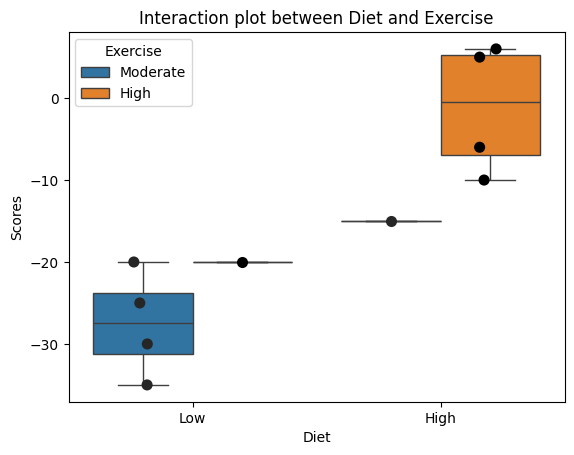

In [364]:
# Create the boxplot
sns.boxplot(
    x='Diet', y='Scores', data=data_unbalanced,
    hue='Exercise',
)

# Overlay the stripplot
sns.stripplot(
    x='Diet', y='Scores', data=data_unbalanced,
    hue='Exercise', dodge=True,
    palette='dark:black', size=8, legend=False)

plt.title('Interaction plot between Diet and Exercise');

In [365]:
# Perform two-way ANOVA
print(
    data_unbalanced.anova(
        dv="Scores",
        between=["Diet", "Exercise"],
        detailed=True,  # default True for N-way ANOVA
        ss_type=2,  # default
    ).round(3) # type: ignore
)

            Source       SS   DF       MS      F  p-unc    np2
0             Diet  390.625  1.0  390.625  7.423  0.034  0.553
1         Exercise  180.625  1.0  180.625  3.432  0.113  0.364
2  Diet * Exercise   15.625  1.0   15.625  0.297  0.605  0.047
3         Residual  315.750  6.0   52.625    NaN    NaN    NaN


When dealing with unbalanced ANOVA designs, the choice between Type I, Type II, and Type III sums of squares (SS) can significantly impact the interpretation of results:

1. **Type I SS (Sequential)** are calculated sequentially, meaning the SS for each factor is calculated after accounting for the effects of any previously entered factors in the model. The SS for a factor represents the unique contribution of that factor *after* accounting for the effects of prior factors. Type I SS is generally appropriate when there is a clear order of priority among the factors, and we want to test the effects of each factor after controlling for the effects of previous factors.
2. **Type II SS (Hierarchical)** are calculated hierarchically, meaning the SS for each factor is calculated after accounting for the effects of all other factors at the same or lower level in the model hierarchy. The SS for a factor represents the contribution of that factor *above and beyond* the effects of other factors at the same or lower level. Type II SS is suitable when there is a meaningful hierarchy among the factors, and we want to test the effects of each factor within its level in the hierarchy.
3. **Type III SS (Marginal)** are calculated marginally, meaning the SS for each factor is calculated after accounting for the effects of all other factors in the model, regardless of their order or hierarchy. The SS for a factor represents the contribution of that factor *ignoring* the effects of all other factors. Type III SS is appropriate when there is no clear order or hierarchy among the factors, and we want to test the effects of each factor independently of the others.

The choice of SS type depends on the specific research question and the nature of the factors. For example, if there is a clear order or priority among the factors, Type I SS might be appropriate. Otherwise, ff there is a meaningful hierarchy among the factors, Type II SS might be suitable. Finally, if there is no clear order or hierarchy, and we want to test the effects of each factor independently, Type III SS might be the best choice.

Different statistical software packages may have different default SS types. The Pingouin library uses Type II sums of squares by default for ANOVA calculations. This choice is automatically made when we use the `anova` function without specifying the `ss_type` argument. In balanced designs, where all cells have equal sample sizes, the different types of sums of squares (Type I, II, and III) yield the same results, so the default choice of Type II has no impact. It's essential to be aware of the default and choose the appropriate type based on your research question. The interpretation of the results should always be based on the chosen SS type.

In [366]:
results_unbalanced_anova_statsmodels = ols(
    formula="Scores ~ Diet*Exercise",  # Notice that Diet and Exercise are of type string ~ readily categories
    data=data_unbalanced
).fit()

# Print the ANOVA table with type I SS
print(anova_lm(results_unbalanced_anova_statsmodels, typ=1))

                df    sum_sq   mean_sq          F    PR(>F)
Diet           1.0  1210.000  1210.000  22.992874  0.003016
Exercise       1.0   180.625   180.625   3.432304  0.113373
Diet:Exercise  1.0    15.625    15.625   0.296912  0.605470
Residual       6.0   315.750    52.625        NaN       NaN


In [367]:
# Print the ANOVA table with type II SS
print(anova_lm(results_unbalanced_anova_statsmodels, typ=2))

                sum_sq   df         F    PR(>F)
Diet           390.625  1.0  7.422803  0.034437
Exercise       180.625  1.0  3.432304  0.113373
Diet:Exercise   15.625  1.0  0.296912  0.605470
Residual       315.750  6.0       NaN       NaN


In [368]:
# Print the ANOVA table with type III SS
print(anova_lm(results_unbalanced_anova_statsmodels, typ=3))

                sum_sq   df         F    PR(>F)
Intercept        6.250  1.0  0.118765  0.742136
Diet           281.250  1.0  5.344418  0.060120
Exercise       151.250  1.0  2.874109  0.140947
Diet:Exercise   15.625  1.0  0.296912  0.605470
Residual       315.750  6.0       NaN       NaN


## Special designs

We've explored the fundamental concepts and applications of one-way ANOVA, repeated measures ANOVA, their non-parametric counterparts, and two-way ANOVA. Now, let's delve into some special designs that extend these basic principles to address more complex research questions. These designs offer powerful tools for analyzing a wide range of research scenarios, allowing us to gain deeper insights into complex relationships between variables. We'll focus on the practical aspects of obtaining and interpreting the results, without delving too deeply into the underlying mathematical details.

### Mixed-design ANOVA

Mixed-design ANOVA is a powerful statistical technique used to analyze data that *combines elements of between-subjects and within-subjects designs*. In simpler terms, it allows us to examine the effects of both independent variables that vary between subjects (e.g., different treatment groups) and independent variables that vary within subjects (e.g., repeated measurements over time).

This type of design is frequently employed in research where we want to assess the effects of an intervention or treatment while also considering individual differences between subjects. For example, we might be interested in studying the effects of a new drug on blood pressure, but we also want to account for variations in blood pressure due to factors like age, gender, or pre-existing conditions.

In a mixed-design ANOVA, one factor is a between-subjects variable, and another factor is a within-subjects variable. This allows us to examine both the main effects of each factor and the interaction between the two factors. The interaction effect is particularly important as it tells us whether the effect of one factor depends on the level of the other factor.

We'll use a toy dataset of memory scores collected from two groups at three time points. This dataset, available in the Pingouin library, will allow us to demonstrate the application of mixed-design ANOVA.

In [369]:
# Load the 'mixed_anova' dataset
data_mixed = pg.read_dataset('mixed_anova')

# Display the first few rows of the DataFrame
data_mixed.head()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


In a mixed ANOVA design, we analyze the same subjects over time under different conditions *or* at different time points, while also considering the effect of a between-subjects factor, such as 'Group'. Each subject receives *only one level of the between-subjects treatment* (e.g., is assigned to only one 'Group'), but is measured repeatedly across the within-subjects conditions or time points. This allows us to track changes within individuals across the various conditions or time points, and also to compare the responses between different groups.

In [370]:
data_mixed.query('Subject == 0')

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
30,5.102160,January,Control,0
60,4.525764,June,Control,0


We can't directly combine a Seaborn plot with a Pingouin paired plot in a single figure. This is because they are generated using different underlying libraries (seaborn uses Matplotlib, while Pingouin uses Seaborn, which in turn uses Matplotlib).

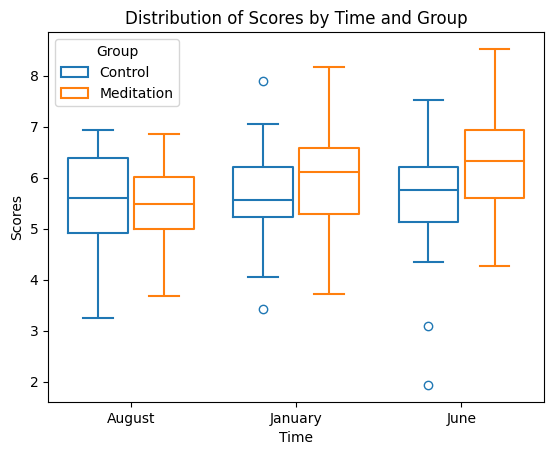

In [371]:
# Create the boxplot
sns.boxplot(
    x='Time',
    y='Scores',
    data=data_mixed,
    hue='Group',
    fill=False,
    gap=.1,
)

# Add plot labels and title
plt.title('Distribution of Scores by Time and Group');

However, we can create two separate plots to show the paired plot in each 'Group' for the mixed-design ANOVA.

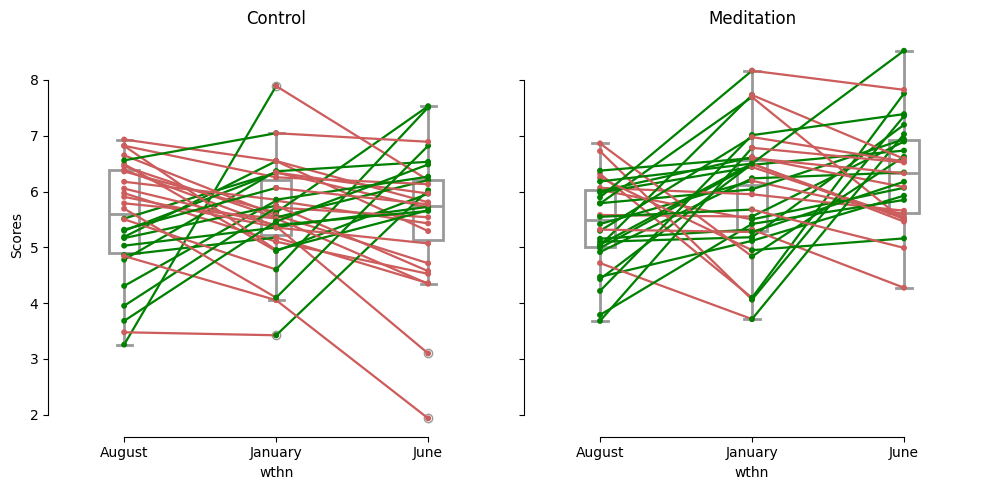

In [372]:
# Get unique values of 'Group'
groups = data_mixed['Group'].unique()
n_groups = len(groups)

# Create subplots
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), sharey=True)

# Loop through groups and create paired plots
for i, group in enumerate(groups):
    pg.plot_paired(
        data=data_mixed[data_mixed['Group'] == group],
        dv='Scores',
        within='Time',
        subject='Subject',
        boxplot=True,
        orient='v',
        ax=axes[i],  # Assign plot to the correct subplot
        boxplot_kwargs={'color': 'white', 'linewidth': 2, 'zorder': 1}
    )
    axes[i].set_title(group)
    sns.despine(trim=True, ax=axes[i])

plt.tight_layout();

We can use the [`pg.mixed_anova` function in Pingouin to perform mixed-design ANOVA](https://pingouin-stats.org/build/html/generated/pingouin.mixed_anova.html). This function combines elements from both `pg.anova` (for between-subjects designs) and `pg.rm_anova` (for within-subjects designs) to analyze data with both between-subjects and within-subjects factors.

The main difference between `pg.mixed_anova` and the other two functions is that it allows us to specify both a *'between'* factor and a *'within'* factor. This enables us to analyze the main effects of each factor as well as the interaction between them. In contrast, `pg.anova` only handles between-subjects factors, while `pg.rm_anova` only handles within-subjects factors.

In [373]:
# Perform mixed-design ANOVA
print(
    pg.mixed_anova(
        dv='Scores',
        between='Group',
        within='Time',
        subject='Subject',
        data=data_mixed
    ).round(3)
)

        Source     SS  DF1  DF2     MS      F  p-unc    np2    eps
0        Group  5.460    1   58  5.460  5.052  0.028  0.080    NaN
1         Time  7.628    2  116  3.814  4.027  0.020  0.065  0.999
2  Interaction  5.167    2  116  2.584  2.728  0.070  0.045    NaN


To interpret the results, we focus on the F-statistics and their associated P values. If the P value for a factor or interaction is less than our significance level (typically 0.05), we reject the null hypothesis and conclude that there is a statistically significant effect. We can then examine the effect size (η²<sub>p</sub>) to assess the magnitude of the effect.

In this case, the P value for the between-subjects factor 'Group' is 0.028, which is less than 0.05. This indicates a statistically significant difference between the groups in terms of their overall scores. The P value for the within-subjects factor 'Time' is also less than 0.05, indicating a significant difference in scores across the different time points. However, the P value for the 'Interaction' effect is higher than 0.05, suggesting that the effect of 'Time' on 'Scores' is not different between the two groups.

By examining the effect sizes, we can see that both the 'Group' factor and the 'Time' factor have small effects (η²<sub>p</sub> = 0.08 and η²<sub>p</sub> = 0.065, respectively). The 'Interaction' effect also has a small effect size (η²<sub>p</sub> = 0.045), but it's not statistically significant.

Overall, the results suggest that both the 'Group' and 'Time' factors have significant, albeit small, effects on 'Scores'. However, the effect of 'Time' does not differ significantly between the two groups.

_Notes - It seems that the `between` argument in `statsmodels.stats.anova.AnovaRM` is not yet fully implemented, and using `mixedlm` doesn't directly provide the classic ANOVA table format with F-statistics and P values. Therefore, we'll focus on using Pingouin for mixed-design ANOVA for the time being._

### N-way ANOVA

N-way ANOVA, also known as multi-way ANOVA, extends the principles of ANOVA to analyze the effects of three or more independent variables (factors) on a dependent variable simultaneously. This allows us to examine complex relationships between multiple factors and gain a more comprehensive understanding of their combined influence on the outcome variable.

In N-way ANOVA, we can analyze:

- *Main effects:* the individual effects of each factor on the dependent variable, independent of the other factors.
- *Interaction effects:* the combined effects of two or more factors, where the effect of one factor depends on the level of another factor.
- *Higher-order interactions:* the interactions between three or more factors, indicating more complex relationships between the variables.

We can use the same tools and techniques for N-way ANOVA as we did for one-way and two-way ANOVA. For example, we can use a **three-way ANOVA** to analyze cholesterol levels, considering factors such as age, gender, and treatment type simultaneously.

In [374]:
# Load the 'anova3' dataset
data_three_way_anova = pg.read_dataset('anova3')

# Display the first few rows of the DataFrame
data_three_way_anova.head()

,Sex,Risk,Drug,Cholesterol
0,M,Low,A,4.868845
1,M,Low,A,6.862204
2,M,Low,A,4.602797
3,M,Low,A,3.576900
4,M,Low,A,5.739727


We can use [seaborn's `catplot()` function](https://seaborn.pydata.org/generated/seaborn.catplot.html) to create a plot with one variable as a panel separation. This will allow us to visualize the relationships between the variables in the 3-way ANOVA design.

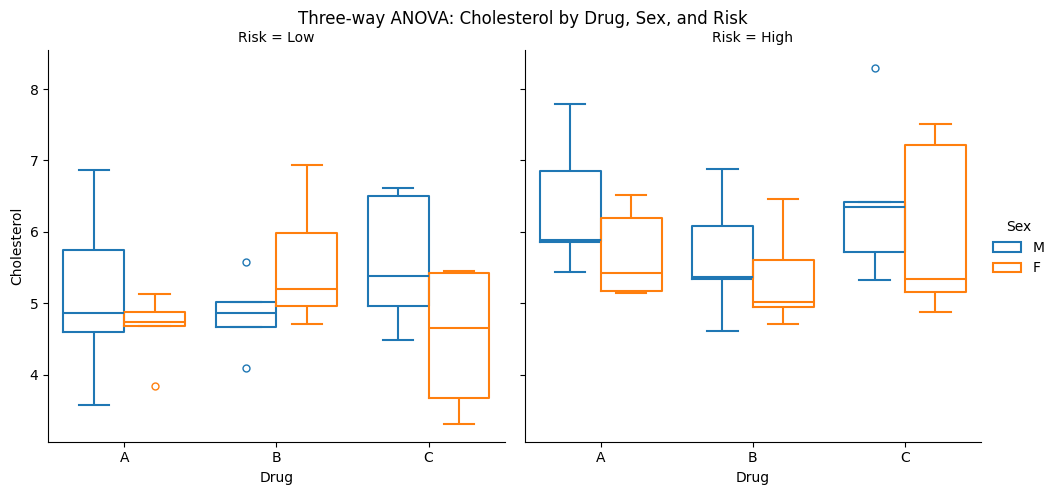

In [375]:
# Create the catplot with 'Drug' as the panel separation
g = sns.catplot(
    x='Drug',
    y='Cholesterol',
    hue='Sex',
    col='Risk',  # Separate panels by 'Risk'
    data=data_three_way_anova,
    kind='box',
    dodge=True,  # Separate points for different 'Dosage' levels
    fill=False,
)

# Add plot title
g.figure.subplots_adjust(top=.9)
g.figure.suptitle('Three-way ANOVA: Cholesterol by Drug, Sex, and Risk');

We can use the `groupby` method to verify that the design is balanced, with 5 samples for each combination of factors.

In [376]:
data_three_way_anova.groupby(['Drug', 'Sex', 'Risk']).agg(['count'])

Cholesterol
                    count
Drug Sex Risk            
A    F   High           5
         Low            5
     M   High           5
         Low            5
B    F   High           5
         Low            5
     M   High           5
         Low            5
C    F   High           5
         Low            5
     M   High           5
         Low            5

In [377]:
# Perform three-way ANOVA with Pingouin
print(
    data_three_way_anova.anova(
        dv='Cholesterol',
        between=['Drug', 'Sex', 'Risk'],
    ).round(3) # type: ignore
)

              Source      SS    DF      MS       F  p-unc    np2
0               Drug   0.816   2.0   0.408   0.484  0.619  0.020
1                Sex   2.075   1.0   2.075   2.462  0.123  0.049
2               Risk  11.332   1.0  11.332  13.449  0.001  0.219
3         Drug * Sex   2.564   2.0   1.282   1.522  0.229  0.060
4        Drug * Risk   2.438   2.0   1.219   1.446  0.245  0.057
5         Sex * Risk   0.117   1.0   0.117   0.139  0.711  0.003
6  Drug * Sex * Risk   1.844   2.0   0.922   1.094  0.343  0.044
7           Residual  40.445  48.0   0.843     NaN    NaN    NaN


In [378]:
# Perform three-way ANOVA with statsmodels
results_three_way_anova_statsmodels = ols(
    formula="Cholesterol ~ Drug * Sex * Risk",  # Notice that Drug, Sex, and Risk are of type string ~ readily categories
    # formula="""
    # Cholesterol ~ Drug + Sex + Risk +
    # Drug:Sex + Drug:Risk + Sex:Risk +
    # Drug:Sex:Risk
    # """,
    data=data_three_way_anova
).fit()

# Print the ANOVA table with type I SS
print(anova_lm(results_three_way_anova_statsmodels))

                 df     sum_sq    mean_sq          F    PR(>F)
Drug            2.0   0.815743   0.407872   0.484066  0.619249
Sex             1.0   2.074568   2.074568   2.462115  0.123191
Risk            1.0  11.332130  11.332130  13.449071  0.000613
Drug:Sex        2.0   2.564162   1.282081   1.521585  0.228711
Drug:Risk       2.0   2.437511   1.218755   1.446430  0.245485
Sex:Risk        1.0   0.117441   0.117441   0.139381  0.710541
Drug:Sex:Risk   2.0   1.843788   0.921894   1.094112  0.343041
Residual       48.0  40.444597   0.842596        NaN       NaN


Pingouin can also handle unbalanced designs in N-way ANOVA by using statsmodels internally, just like it does for two-way ANOVA.

In [379]:
data_unbalanced_three_way_anova = pg.read_dataset('anova3_unbalanced')

data_unbalanced_three_way_anova.groupby(['Drug', 'Sex', 'Risk']).agg(['count'])

Cholesterol
                    count
Drug Sex Risk            
A    F   High           5
         Low            7
     M   High           5
         Low            6
B    F   High           6
         Low            7
     M   High           6
         Low            5
C    F   High           6
         Low            6
     M   High           5
         Low            5

In [380]:
# Unbalanced 3-way ANOVA with Pingouin
print(
    data_unbalanced_three_way_anova.anova(
        dv='Cholesterol',
        between=['Drug', 'Sex', 'Risk'],
        ss_type=2,
    ).round(3) # type: ignore
)

              Source      SS    DF      MS       F  p-unc    np2
0               Drug   0.694   2.0   0.347   0.429  0.653  0.015
1                Sex   3.042   1.0   3.042   3.759  0.057  0.062
2               Risk  12.276   1.0  12.276  15.169  0.000  0.210
3         Drug * Sex   1.196   2.0   0.598   0.739  0.482  0.025
4        Drug * Risk   1.894   2.0   0.947   1.170  0.318  0.039
5         Sex * Risk   0.080   1.0   0.080   0.099  0.754  0.002
6  Drug * Sex * Risk   0.817   2.0   0.409   0.505  0.606  0.017
7           Residual  46.128  57.0   0.809     NaN    NaN    NaN


In [381]:
# Unbalanced 3-way ANOVA with statsmodels
results_unbalanced_anova_statsmodels = ols(
    formula="Cholesterol ~ Drug * Sex * Risk",  # Notice that Diet and Exercise are of type string ~ readily categories
    data=data_unbalanced_three_way_anova
).fit()

# Print the ANOVA table with type II SS
print(anova_lm(results_unbalanced_anova_statsmodels, typ=2))

                  sum_sq    df          F    PR(>F)
Drug            0.694293   2.0   0.428968  0.653266
Sex             3.042246   1.0   3.759293  0.057471
Risk           12.275772   1.0  15.169127  0.000261
Drug:Sex        1.195612   2.0   0.738707  0.482249
Drug:Risk       1.894341   2.0   1.170415  0.317582
Sex:Risk        0.080249   1.0   0.099163  0.753986
Drug:Sex:Risk   0.817440   2.0   0.505054  0.606148
Residual       46.127837  57.0        NaN       NaN


### Two-way repeated measures ANOVA

Two-way repeated measures ANOVA (two-way rmANOVA) extends the concept of rmANOVA to analyze the effects of two within-subjects factors on a continuous dependent variable. This design is useful when we have repeated measurements on the same subjects under different conditions or at different time points, and we want to examine the effects of two factors simultaneously.

In two-way repeated measures ANOVA, there are two within-subjects factors (treatments or time) to study. For example, let's imagine a study design where:

* The same animals were first given inactive treatment and the response measured; then they were given the active treatment and the response measured again.
* The same animals are first measured for a response after a short duration and then later after a long duration.
* Each animal was first given the inactive treatment and measured for a short and then a long duration; then the same animal was given the active treatment and measured for a short and then a long duration. This is a repeated measures in both factors design.

This design allows us to study the effects of both the treatment and the time on the response, as well as the interaction between the two factors.

In the example below, the [dataset originates from a company that wants to evaluate the effectiveness of a new training program for its customer service staff](https://real-statistics.com/anova-repeated-measures/two-within-subjects-factors/). They collected performance data on 10 employees before and after the training program in three different areas: 'Product' knowledge, 'Client' interaction, and 'Action' taken.

In [382]:
# Load the 'rm_anova2' dataset
data_two_way_rmanova = pg.read_dataset('rm_anova2')

# Display a few rows of the table
data_two_way_rmanova.sample(10)

,Subject,Time,Metric,Performance
0,1,Pre,Product,13
46,7,Post,Client,36
6,7,Pre,Product,17
35,6,Post,Product,6
44,5,Post,Client,28
28,9,Pre,Action,24
33,4,Post,Product,18
2,3,Pre,Product,17
13,4,Pre,Client,25
56,7,Post,Action,38


In [383]:
# Print the number of unique Subjects
print(f"There are {data_two_way_rmanova['Subject'].nunique()} unique Subjects")

# Pivot to the mean of the Performance values calculated for each combination of Time and Metric
data_two_way_rmanova.pivot_table(
    index='Time',
    columns='Metric',
    values='Performance',
    aggfunc=['count']
)

There are 10 unique Subjects


count               
Metric Action Client Product
Time                        
Post       10     10      10
Pre        10     10      10

This table below shows the performance data for 'Subject' number 1:

* The 'Subject' column identifies the participant in the study. Here we show only 'Subject' number 1.
* The 'Time' column shows the time point at which the measurement was taken. There are two levels: "Pre" and "Post".
* The 'Metric' column indicates the specific performance metric being measured. There are three levels: "Product", "Client", and "Action".
* The 'Performance' column contains the actual performance scores under each combination of 'Time' and 'Metric'.

Overall, it appears that the intervention generally led to improved performance for Subject #1 across most metrics. However, this is just a single subject, and we need to analyze the data from all subjects to draw any definitive conclusions about the effects of the intervention.

Further analysis with rmANOVA will help to determine whether there is a significant overall difference in performance between the "Pre" and "Post" time points across all metrics, whether there is a significant overall difference in performance between the different metrics ("Product", "Client", "Action") across all time points, and whether the effect of the intervention on performance varies depending on the specific metric being considered.

In [384]:
# Display the data for Subject #1
data_two_way_rmanova.query('Subject == 1')

,Subject,Time,Metric,Performance
0,1,Pre,Product,13
10,1,Pre,Client,12
20,1,Pre,Action,17
30,1,Post,Product,18
40,1,Post,Client,30
50,1,Post,Action,34


To visualize how performance changes from pre-treatment to post-treatment for each metric, we create separate subplots for each metric. Within each subplot, we use paired plots to display the individual data points for both treatments, enabling us to track changes within individuals and compare the effects of the treatments across different metrics.

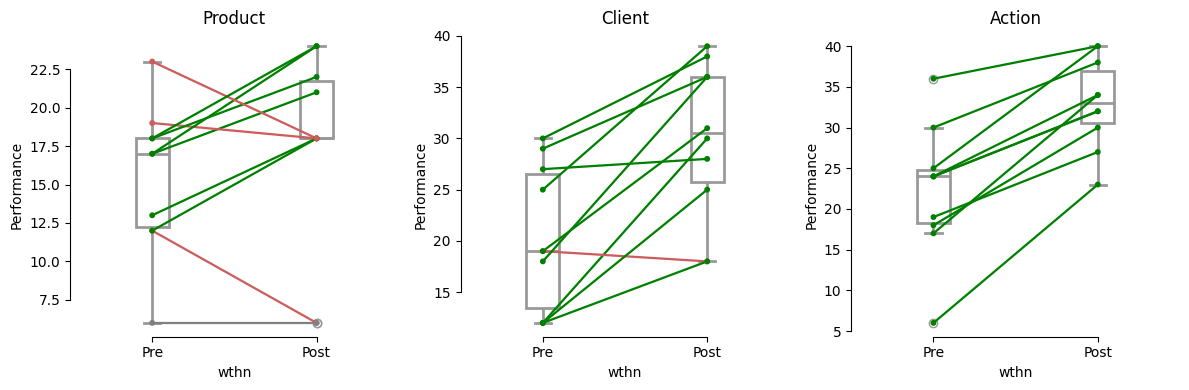

In [385]:
# Create subplots - one for each metric
metrics = data_two_way_rmanova['Metric'].unique()
n_metrics = len(metrics)

fig, axes = plt.subplots(1, n_metrics, figsize=(4 * n_metrics, 4))

# Loop through metrics and create paired plots
for i, metric in enumerate(metrics):
    pg.plot_paired(
        data=data_two_way_rmanova[data_two_way_rmanova['Metric'] == metric],
        dv='Performance',
        within='Time',
        order=['Pre', 'Post'],  # We better see the effect of the treatment
        subject='Subject',
        boxplot=True,
        orient='v',
        ax=axes[i],
        boxplot_kwargs={'color': 'white', 'linewidth': 2, 'zorder': 1}
    )
    axes[i].set_title(metric)
    sns.despine(trim=True, ax=axes[i])

plt.tight_layout();

Performing a two-way repeated measures ANOVA is similar to a standard repeated measures ANOVA. We provide a list of within-subjects factors to Pingouin's `rm_anova` function, instead of just one.

Note that `pg.plot_paired` is used to visualize paired data for a *single within-subjects factor*, while `pg.rm_anova` performs the statistical analysis considering all within-subjects factors simultaneously.

In a two-way repeated measures ANOVA design, we analyze the *same subjects* under different conditions or at different time points *for multiple dependent variables*:

1. Each subject undergoes both 'Pre' and 'Post' treatments, i.e., before and after the training program.
2. Their 'Performance' is measured repeatedly for *different* 'Metrics', i.e., 'Product', 'Client', and 'Action'.

This allows us to track changes within individuals across the treatments and the different 'Metrics'. We can then analyze the main effects of 'Time' and 'Metric', as well as their interaction, to understand how performance changes across both factors.

In [386]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Two-way repeated measures ANOVA with Pingouin
data_two_way_rmanova.rm_anova(
    dv='Performance',
    within=['Metric', 'Time'],
    subject='Subject',
) # type: ignore

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Metric,1365.233333,2,18,682.616667,26.95919,0.000004,0.000005,0.359335,0.969103
1,Time,828.816667,1,9,828.816667,33.85228,0.000254,0.000254,0.254011,1.000000
2,Metric * Time,224.433333,2,18,112.216667,12.63227,0.000373,0.001708,0.084420,0.727166


The `AnovaRM` function in statsmodels can also handle multiple within-subjects factors.

In [387]:
# Perform rmANOVA using AnovaRM
model_two_way_anova_rm_statsmodels = AnovaRM(
    data=data_two_way_rmanova,
    depvar='Performance',
    subject='Subject',
    within=['Metric', 'Time']
)

# results_two_way_anova_rm_statsmodels = model_two_way_anova_rm_statsmodels.fit()

# # Print the ANOVA table
# print(results_two_way_anova_rm_statsmodels.anova_table)
print(model_two_way_anova_rm_statsmodels.fit())

                  Anova
            F Value Num DF  Den DF Pr > F
-----------------------------------------
Metric      26.9592 2.0000 18.0000 0.0000
Time        33.8523 1.0000  9.0000 0.0003
Metric:Time 12.6323 2.0000 18.0000 0.0004



The main effect of 'Metric' is statistically significant (F(2, 18) = 26.9592, P < 0.0001). This suggests that there are significant differences in the dependent variable across the different levels of the 'Metric' factor. The main effect of 'Time' is also statistically significant (F(1, 9) = 33.8523, P = 0.0003). This suggests that there are significant differences in the dependent variable across the different levels of the 'Time' factor. Finally, the interaction effect between 'Metric' and 'Time' is statistically significant (F(2, 18) = 12.6323, P = 0.0004). This suggests that the effect of one factor depends on the level of the other factor.

Overall, the results indicate that both within-subjects factors, 'Metric' and 'Time', have significant main effects on the dependent variable, and there is also a significant interaction between them.

### Analysis of covariance (ANCOVA)

ANCOVA is a statistical technique that combines elements of ANOVA and *regression analysis*. It allows us to examine the effects of one or more independent variables on a dependent variable while controlling for the influence of one or more continuous variables called covariates.

The main difference between ANOVA and ANCOVA is the inclusion of covariates. ANOVA only analyzes the effects of categorical independent variables, while ANCOVA incorporates both categorical and continuous independent variables (covariates) in the model:

| Feature               | ANOVA                     | ANCOVA                                                     |
|:--------------------- |:------------------------- |:---------------------------------------------------------- |
| Independent variables | Categorical only          | Categorical and continuous                                 |
| Covariates            | Not included              | Included                                                   |
| Purpose               | Examine group differences | Examine group differences while controlling for covariates |
| Statistical power     | May be lower              | May be higher                                              |

ANCOVA is appropriate when we want to:

- Control for the effects of confounding variables: **covariates** are variables that are not of primary interest but may affect the relationship between the independent and dependent variables. By including covariates in the model, ANCOVA can control for their potential confounding effects and provide a more accurate assessment of the true effects of the independent variables.
- Increase the statistical power of the analysis: ANCOVA can increase the statistical power of the analysis by reducing the error variance. This is because the covariates explain some of the variability in the dependent variable that would otherwise be attributed to error.
- Adjust for pre-existing differences between groups: ANCOVA can be used to adjust for pre-existing differences between groups on the dependent variable. This is particularly useful in non-randomized studies where groups may not be equivalent at baseline.

In the following example, a [school system is comparing four reading teaching methods to determine which is most effective](https://real-statistics.com/analysis-of-covariance-ancova/basic-concepts-ancova/). They randomly assigned 40 children to four groups, each receiving a different teaching method. A researcher believes family income may influence reading test scores, suggesting that children from higher-income families might perform better regardless of the teaching method. The study aims to determine if there is a significant difference between the teaching methods after accounting for family income.

In [388]:
data_ancova = pg.read_dataset('ancova')
data_ancova.head()

,Scores,Income,BMI,Method
0,12,17.5,20,A
1,39,104.6,20,A
2,36,64.7,24,A
3,17,47.0,19,A
4,25,22.0,21,A


The same assumptions as for ANOVA (normality, homogeneity of variance, and random independent samples) are required for ANCOVA, For each level of the independent variable.

In [389]:
print(pg.normality(data=data_ancova, dv='Scores', group='Method'))

               W      pval  normal
Method                            
A       0.933315  0.546721    True
B       0.920344  0.432663    True
C       0.937504  0.525585    True
D       0.936559  0.515399    True


In [390]:
print(pg.homoscedasticity(data=data_ancova, dv='Scores', group='Method'))

               W      pval  equal_var
levene  0.925541  0.439635       True


ANCOVA also has some additional assumptions that need to be checked before conducting the analysis. These assumptions include:

- *Linearity:* there should be a linear relationship between the dependent variable and the covariate for each level of the independent variable.
- *Homogeneity of regression slopes:* the slopes of the regression lines representing the relationship between the dependent variable and the covariate should be parallel across all levels of the independent variable. This means that the effect of the covariate on the dependent variable is the same across all groups.
- *Independence of covariate and treatment effects:* the covariate should be independent of the treatment effects, meaning there is no interaction between the covariate and the independent variable.

To assess these assumptions, we can create scatter plots of the dependent variable against the covariate for each level of the independent variable. This will help us visualize the relationship between the variables and check for linearity and homogeneity of regression slopes.

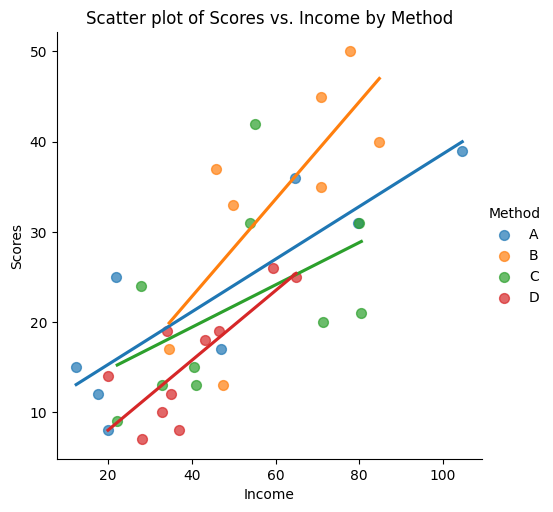

In [391]:
# Create the line plot
sns.lmplot(
    x='Income',
    y='Scores',
    data=data_ancova,
    hue='Method',
    ci=None,  # Remove confidence intervals for clearer visualization
    scatter_kws={'s': 50, 'alpha': 0.7}  # Adjust point size and transparency
)

# Add plot title and labels
plt.title('Scatter plot of Scores vs. Income by Method')
plt.xlabel('Income')
plt.ylabel('Scores');

While the four lines are not perfectly parallel, their slopes are quite similar, suggesting that the assumption of homogeneity of regression slopes is reasonably met.

In [392]:
# Perform ANCOVA using pingouin
pg.ancova(
    data=data_ancova,
    dv='Scores',
    covar=['Income'],  # This can be a list of covariates
    between='Method'
)

,Source,SS,DF,F,p-unc,np2
0,Method,571.029883,3,3.336482,0.031940,0.244077
1,Income,1678.352687,1,29.419438,0.000006,0.486920
2,Residual,1768.522313,31,NaN,NaN,NaN


To interpret the results, we focus on the F-statistics and their associated P values. If the P value for a factor or covariate is less than our significance level (typically 0.05), we reject the null hypothesis and conclude that there is a statistically significant effect. We can then examine the effect size (η²<sub>p</sub>) to assess the magnitude of the effect.

In this case, the P value for the 'Method' factor is 0.032, which is less than 0.05. This indicates a statistically significant difference between the teaching methods in terms of their effect on 'Scores', even after controlling for 'Income'. The P value for the 'Income' covariate is also less than 0.05, indicating that 'Income' has a significant effect on 'Scores'.

By examining the effect sizes, we can see that 'Income' has a larger effect size (η²<sub>p</sub> = 0.487) than 'Method' (η²<sub>p</sub> = 0.244). This suggests that 'Income' explains a greater proportion of the variance in 'Scores' compared to 'Method'.

Overall, the results suggest that both the teaching 'Method' and family 'Income' have significant effects on 'Scores'. However, 'Income' appears to have a stronger influence on 'Scores' than the teaching 'Method'.

[Repeated measures correlation (rmcorr)](https://pingouin-stats.org/build/html/generated/pingouin.rm_corr.html) is a statistical technique for determining the common within-individual association for paired measures assessed on two or more occasions for multiple individuals. It provides the best linear fit for each participant using parallel regression lines, representing the strength of the linear association between two variables with a coefficient ranging from -1 to 1, similar to a Pearson correlation coefficient.

In [393]:
pg.rm_corr(data=data_ancova, x='Income', y='Scores', subject='Method')

,r,dof,pval,CI95%,power
rm_corr,0.697797,31,0.000006,"[0.47, 0.84]",0.997618


We can visualize the relationship between the covariate ('Income') and the dependent variable ('Scores') using a [repeated measures correlation plot](https://pingouin-stats.org/build/html/generated/pingouin.plot_rm_corr.html). This plot, where parallel lines are fitted to each subject's data, will show the correlation between 'Income' and 'Scores', helping us assess the consistency of the relationship over time.

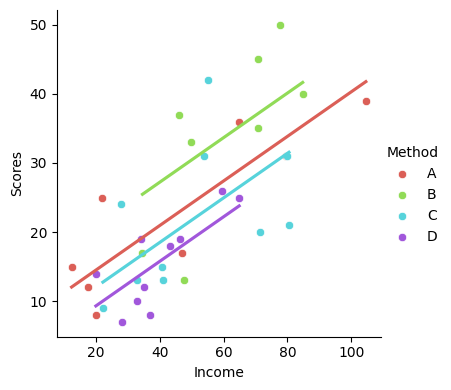

In [394]:
# Create the repeated measures correlation plot
pg.plot_rm_corr(
    data=data_ancova,
    x='Income',
    y='Scores',
    subject='Method',
    legend=True
);

While ANCOVA is used to test the significance of the effect of an independent variable on a dependent variable while controlling for the effect of a covariate, rmcorr is used to assess the strength of the linear association between two variables.

## Multiple comparison tests after ANOVA

When we conduct an ANOVA and obtain a statistically significant result, it indicates that there are differences between at least two of the group means. However, ANOVA doesn't tell us *which* specific groups are different. This is where multiple comparison tests come in.

Multiple comparison tests, also known as **post-hoc analysis**, allow us to make pairwise comparisons between all the groups and determine which ones are significantly different from each other. This provides more detailed and specific insights into the group differences, helping us understand the patterns in the data more comprehensively.

For instance, imagine we're comparing the effectiveness of three different fertilizers on plant growth. ANOVA might tell us that there's a significant difference between the fertilizers, but it won't tell us if fertilizer A is different from fertilizer B, if fertilizer B is different from fertilizer C, or if all three are different from each other. Multiple comparison tests allow us to answer these specific questions.

However, it's important to note that conducting multiple comparisons increases the risk of Type I error (false positives). This is because each pairwise comparison has a chance of producing a statistically significant result by chance, even if there is no true difference between the groups, as discussed in the chapter on statistical significance. To control for this inflated error rate, multiple comparison tests use adjusted p-values or critical values to maintain the overall significance level.

Therefore, multiple comparison tests are a crucial step after ANOVA when we want to pinpoint the specific group differences and gain a more nuanced understanding of the data. Several multiple comparison tests are available, each with its own advantages and disadvantages. Some common options include:

- **Tukey's HSD:** this test is considered one of the most powerful and robust methods. It controls the family-wise error rate, meaning it protects against the overall probability of making Type I errors (falsely rejecting a true null hypothesis).
- **Dunnett's Test:** this test is specifically designed for comparing each group to a control group.
- **Bonferroni:** this test is very conservative, meaning it has a lower chance of making a Type I error but may have less power to detect real differences.
- **Scheffé:** this test is less conservative than Bonferroni and can be used for a wider range of comparisons, including pairwise comparisons and comparisons of groups to linear combinations of other groups.

Choosing the appropriate multiple comparison test depends on several factors, including:

* *Specific comparisons:* which specific comparisons are of interest?
* *Group sizes:* are the group sizes equal or unequal?
* *Type II error:* how important is it to avoid Type II errors (falsely failing to reject a false null hypothesis)?

However, conducting multiple comparisons increases the overall chance of making a Type I error. To control this risk, multiple comparison tests adjust the significance level accordingly. Some multiple comparison tests are more powerful than others, meaning they are more likely to detect true differences between groups.

Some multiple comparison tests assume equal variances across groups, while others are more robust to unequal variances.

It's crucial to choose an appropriate multiple comparison test based on the specific research question, the characteristics of the data, and the desired level of power and control for Type I errors.

Python libraries like Statsmodels and Pingouin provide functions to perform various multiple comparison tests. These functions typically take the ANOVA results as input and perform the appropriate tests, adjusting for multiple comparisons as needed.

### Tukey's HSD test

The *Tukey HSD (honestly significant difference)* test is a common post-hoc test used for making pairwise comparisons between means after conducting an ANOVA. It is specifically designed to control the family-wise error rate when performing multiple pairwise comparisons. This means it adjusts the significance level to account for the increased risk of Type I errors (false positives) that arise when conducting multiple tests.

#### Calculating confidence intervals for mean differences

When computing most multiple comparisons tests, we leverage the assumption of *equal variances across groups*, which is often made in ANOVA. This allows us to use the *pooled SD* of all the groups to estimate the standard deviation (SD) for the difference between two means, rather than relying solely on the SDs of those two groups.

The pooled variance $s_p^2$, or MS<sub>error</sub>, which represents the average variance across all groups, is calculated as:

$$s_p^2 = \frac{\mathrm{SSE}}{n - k}$$

where:

- $\mathrm{SSE}$ is the sum of squares error from the ANOVA table.
- $n$ is the total number of observations.
- $k$ is the number of groups.

The Studentized range statistic ($q$) for the difference between two means is calculated as:

$$q = \frac{|\bar x_i - \bar x_j|}{\sqrt{s_p^2 / m}}$$

where:

- $\bar x_i$ and $\bar x_j$ are the means of groups $i$ and $j$, respectively.
- $m$ is the number of observations per group or sample size (assuming equal group sizes).

The P values are then approximated using the Studentized range distribution $Q(\sqrt 2|q_i|, k, n - k)$ where $k$ is the total number of groups and $n$ is the total sample size.

The margin of error for the confidence interval (CI) of the difference between two means is calculated by multiplying the standard error (SE) of the difference by a *critical value*. This critical value depends on the chosen test, the degrees of freedom, the desired confidence level, and the number of comparisons.

The formula for the confidence interval is:

$$\bar x_i - \bar x_j \pm q^\ast \sqrt{s_p^2 / m}$$

where:

- $q^\ast$ is the critical value from the Studentized range distribution.

#### The Studentized range distribution

The *Studentized range distribution* is a statistical distribution that is used in various hypothesis tests, including the [Tukey HSD test and the Tukey-Kramer test](https://en.wikipedia.org/wiki/Tukey%27s_range_test#The_studentized_range_(q)_distribution) (discussed below). It is used to compare multiple means and determine which pairs of means are significantly different from each other.

The Studentized range distribution is a modification of the t-distribution that takes into account the number of groups being compared and the degrees of freedom for the error term. It is used to calculate a critical value that is then compared to the calculated test statistic to determine statistical significance.

#### Tukey-Kramer test for unequal sample sizes

The Tukey-Kramer test is a modification of the Tukey HSD test that's used when we have unequal sample sizes. The Tukey-Kramer test adjusts the critical value of $q$ based on the specific sample sizes of the groups being compared. This adjustment ensures that the family-wise error rate is controlled even when the sample sizes are unequal.

The adjusted critical value for the Tukey-Kramer test is calculated as:

$$q^\ast = q_{1 - \alpha, k, \infty} \sqrt{\frac{1}{2} \left( \frac{1}{m_i} + \frac{1}{m_j} \right)}$$

where:

* $q_{1 - \alpha, k, \infty}$ is the upper $\alpha$ quantile of the Studentized range distribution with $k$ and $\infty$ degrees of freedom.
* $m_i$ and $m_j$ are the sample sizes of groups $i$ and $j$, respectively.

This adjusted critical value is then used in the confidence interval formula:

$$\bar x_i - \bar x_j \pm q^\ast \sqrt{s_p^2 \left( \frac{1}{m_i} + \frac{1}{m_j} \right)}$$

#### Tukey multiple comparison with Python

We can use the Statsmodels and Pingouin libraries to perform the Tukey test without manually calculating the q-statistics or looking at the Studentized range distribution. The `pairwise_tukeyhsd` function in Statsmodels provide a convenient way to conduct the Tukey test and obtain P values and confidence intervals.

In [395]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post-hoc test
# This test compares all pairs of 'Hair color' groups
# to determine which pairs have significantly different means.
tukeyhsd = pairwise_tukeyhsd(
    endog=data_anova['Pain threshold'],  # Dependent variable
    groups=data_anova['Hair color'],     # Grouping variable
    alpha=0.05                           # Significance level
)

# Print the results of the Tukey HSD test
print(tukeyhsd.summary())

# The following works similarly
# from statsmodels.stats.multicomp import MultiComparison

# mult_comp = MultiComparison(data_anova['Pain threshold'], data_anova['Hair color'])
# results_tukeyhsd = mult_comp.tukeyhsd()
# print(results_tukeyhsd.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
   Dark Blond  Dark Brunette    -13.8 0.0741 -28.6967  1.0967  False
   Dark Blond    Light Blond      8.0 0.4356  -6.8967 22.8967  False
   Dark Blond Light Brunette     -8.7 0.4147 -24.5004  7.1004  False
Dark Brunette    Light Blond     21.8 0.0037   6.9033 36.6967   True
Dark Brunette Light Brunette      5.1 0.7893 -10.7004 20.9004  False
  Light Blond Light Brunette    -16.7 0.0366 -32.5004 -0.8996   True
--------------------------------------------------------------------


In [396]:
# Access the critical value of the Studentized range statistic
# This value is used to determine the significance of the pairwise comparisons.
q_crit = tukeyhsd.q_crit  # Store the critical value in a variable

# Print the critical value
print(f"Critical value of the Studentized range statistic: {q_crit:.3f}")

Critical value of the Studentized range statistic: 4.076


The key takeaway from the Tukey HSD test is that the 95% confidence level applies to the *entire family of comparisons*, not just to individual intervals. This means there's a 5% chance that one or more of the intervals might not contain the true population value.

When interpreting the results, we should focus on the *set of differences deemed statistically significant*, rather than on individual comparisons. For instance, in the previous table, the differences between 'Light Blond' and 'Dark Brunette', as well as between 'Light Blond' and 'Light Brunette', are statistically significant because their confidence intervals do not include zero.

The complementary [`plot_simultaneous` function](https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.TukeyHSDResults.plot_simultaneous.html#statsmodels.sandbox.stats.multicomp.TukeyHSDResults.plot_simultaneous) provides a visual representation of the results of a Tukey HSD post-hoc test. It generates a plot that displays the confidence intervals for the differences between the means of a specified group and all other groups. This allows us to easily identify which groups have significantly different means (in red) compared to the reference group (in blue).

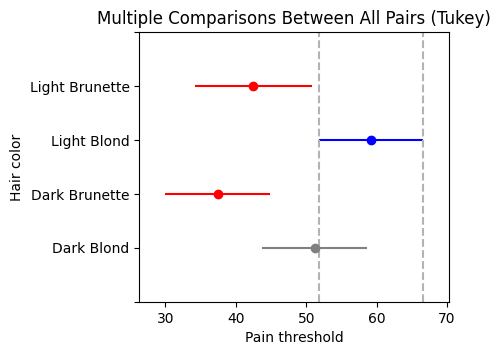

In [397]:
# Plot the results of the Tukey HSD test
# This plot shows the confidence intervals for the differences between the mean
# 'Pain threshold' of the 'Light Blond' group and the means of all other 'Hair color' groups.
tukeyhsd.plot_simultaneous(
    comparison_name='Light Blond',  # The group to compare against
    xlabel='Pain threshold',
    ylabel='Hair color',
    figsize=(4, 3.5)
);

# plt.title("Multiple comparisons to 'Light Blond'");

Pingouin offers a user-friendly approach to multiple comparisons, and its [`pairwise_tukey` function](https://pingouin-stats.org/build/html/generated/pingouin.pairwise_tukey.html) automatically handles unbalanced designs, making it suitable for a wider range of scenarios, such as when the sample sizes are not equal among the groups, as in the current example where we have $n=4$ in the 'Light Brunette' group. However, it doesn't provide the confidence intervals for the pairwise differences.

In [398]:
# Perform Tukey's HSD test using Pingouin
tukey_results_pingouin = pg.pairwise_tukey(
    data_anova,
    dv='Pain threshold',
    between='Hair color',
)

tukey_results_pingouin.round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.169,2.670,0.074,1.414
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.169,-1.548,0.436,-0.811
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482,1.587,0.415,0.982
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.169,-4.218,0.004,-2.337
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482,-0.930,0.789,-0.627
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482,3.046,0.037,2.015


We can also use [the `scikit-posthocs` package to perform post-hoc tests](https://scikit-posthocs.readthedocs.io/en/latest/index.html), including the Tukey HSD test. This package provides a variety of post-hoc tests that can be used after ANOVA to assess pairwise differences between groups.

The `scikit-posthocs` package offers several advantages:

* *Flexibility*: it provides a wide range of post-hoc tests, including the Tukey HSD test, the Bonferroni correction, the Holm-Bonferroni correction, and the Benjamini-Hochberg FDR correction, among others.
* *Ease of use*: the functions in `scikit-posthocs` are straightforward to use and provide clear and concise output, including table of P values, table of significance, diagrams and plot.
* *Integration with other libraries*: `scikit-posthocs` integrates well with other scientific computing libraries in Python, such as NumPy and pandas.

In [399]:
import scikit_posthocs as ph

# Perform Tukey HSD test
tukey_hsd_sp_results = ph.posthoc_tukey_hsd(
    data_anova,
    val_col='Pain threshold',
    group_col='Hair color',
)

# Print the results
print(tukey_hsd_sp_results.round(3))

                Dark Blond  Dark Brunette  Light Blond  Light Brunette
Dark Blond           1.000          0.074        0.436           0.415
Dark Brunette        0.074          1.000        0.004           0.789
Light Blond          0.436          0.004        1.000           0.037
Light Brunette       0.415          0.789        0.037           1.000


In [400]:
# Create a significance table from the Tukey HSD results
# This table provides a compact and visually clear representation of
# the significant pairwise comparisons between the groups.
print(ph.sign_table(tukey_hsd_sp_results))

               Dark Blond Dark Brunette Light Blond Light Brunette
Dark Blond              -            NS          NS             NS
Dark Brunette          NS             -          **             NS
Light Blond            NS            **           -              *
Light Brunette         NS            NS           *              -


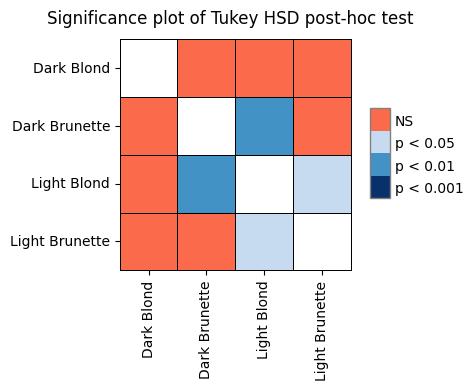

In [401]:
# Create a significance plot from the Tukey HSD results
# This plot provides a visual representation of the significant pairwise
# comparisons between the groups, using colors to indicate significance levels.
fig, ax = plt.subplots(figsize=(4,3))

ph.sign_plot(
    tukey_hsd_sp_results,
    cmap=['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef'],  # Custom colormap
    linewidths=0.5,                        # Adjust linewidths
    linecolor='0',                         # Line color
    clip_on=False,                         # Prevent clipping
    square=True,                           # Make cells square
    cbar_ax_bbox= [0.85, 0.35, 0.05, 0.3], # Colorbar position
    ax=ax
)

# Add plot title
plt.suptitle('Significance plot of Tukey HSD post-hoc test');

### Dunnett's test

Dunnett's test is a multiple comparison procedure used to compare the mean of each treatment group to the mean of a control group. It's a valuable tool when we have a specific control group that we want to use as *a reference for comparison*.

Dunnett's test focuses specifically on comparisons to the control group, making it *more powerful* than other multiple comparison tests (like Tukey's HSD) when our primary interest is in those comparisons. Like Tukey's HSD, Dunnett's test also controls the family-wise error rate, ensuring that the overall probability of making a Type I error (false positive) remains at the desired significance level. But because Dunnett's test makes fewer comparisons than Tukey's HSD, it generally has more power to detect differences between the treatment groups and the control group.

The formula for the confidence interval in Dunnett's test is similar to that of the Tukey test, but it uses a different critical value based on the Dunnett's t-distribution:

$$\bar x_i - \bar x_0 \pm t_D^\ast \sqrt{s_p^2 \left( \frac{1}{m_i} + \frac{1}{m_0} \right)}$$

where:

* $\bar{x}_i$ is the mean of treatment group $i$.
* $\bar{x}_c$ is the mean of the control group.
* $t_D^\ast$ is the critical value from the Dunnett's t-distribution.
* $s_p^2$ is the pooled variance (MSE or MS<sub>W</sub>).
* $m_i$ is the sample size of treatment group $i$.
* $m_0$ is the sample size of the control group.

The critical value $t_D^\ast$ depends on the number of treatment groups, the degrees of freedom for the error term, and the desired significance level. We can find the critical value for a two-sided test with $\mathrm{DF_W} = 15$, $\alpha = 0.05$, and $k = 4$ groups (including the control/reference group) in [precalculated Dunnett's tables](https://www.statology.org/dunnetts-table/): $t_D^\ast = 2.610$.

While Dunnett's critical values are based on the assumption of *equal group sizes*, the formula is still reasonably accurate if the group sizes are not too different. However, for larger discrepancies in group sizes, it's recommended to use more accurate methods that explicitly account for unequal variances, such as the Games-Howell test.

In [402]:
# Calculate the means and sample sizes for each 'Hair color' group
group_summary = data_anova.groupby('Hair color').agg(['mean', 'count']).loc[:, 'Pain threshold']

# Critical value and degrees of freedom (from previous calculations)
t_dunnett = 2.610

# Print the critical t value
print(f"Critical D value (α=0.05, DF_within={DF_within}, k={len(group_summary)}): {t_dunnett:.3f}")

# Compare each group to 'Light Blond' and print significance
control_mean = group_summary.loc['Light Blond', 'mean']
control_count = group_summary.loc['Light Blond', 'count']

print("\nDunnett's test results:")
for group in group_summary.index:
    if group!= 'Light Blond':
        group_mean = group_summary.loc[group, 'mean']
        group_count = group_summary.loc[group, 'count']
        D = t_dunnett * np.sqrt(MS_within * (1/group_count + 1/control_count))
        diff = abs(group_mean - control_mean)
        significant = diff > D
        print(f"Comparison of '{group}' vs. 'Light Blond':")
        print(f"  - Critical D: {D:.3f}")  # Print critical D for each group
        print(f"  - Abosulte mean difference: {diff:.3f}")
        print(f"  - Significant: {significant}")

Critical D value (α=0.05, DF_within=15, k=4): 2.610

Dunnett's test results:
Comparison of 'Dark Blond' vs. 'Light Blond':
  - Critical D: 13.490
  - Abosulte mean difference: 8.000
  - Significant: False
Comparison of 'Dark Brunette' vs. 'Light Blond':
  - Critical D: 13.490
  - Abosulte mean difference: 21.800
  - Significant: True
Comparison of 'Light Brunette' vs. 'Light Blond':
  - Critical D: 14.308
  - Abosulte mean difference: 16.700
  - Significant: True


[SciPy has implemented a Dunnett's test](https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_dunnett.html#hypothesis-dunnett), which facilitates multiple comparisons.

In [403]:
from scipy.stats import dunnett

# Extract the data for each hair color group
groups = [
    data_anova['Pain threshold'][data_anova['Hair color'] == color]
    for color in ['Dark Blond', 'Dark Brunette', 'Light Brunette']  # Exclude 'Light Blond' as it's the control
]
control = data_anova['Pain threshold'][data_anova['Hair color'] == 'Light Blond']

# Perform Dunnett's test
res = dunnett(*groups, control=control)

# Print the results
print("Dunnett's test results:")
for i, group in enumerate(['Dark Blond', 'Dark Brunette', 'Light Brunette']):
    print(f"  - {group} vs. Light Blond: Statistic = {res.statistic[i]:.2f}; P value = {res.pvalue[i]:.4f}")

Dunnett's test results:
  - Dark Blond vs. Light Blond: Statistic = -1.55; P value = 0.3180
  - Dark Brunette vs. Light Blond: Statistic = -4.22; P value = 0.0021
  - Light Brunette vs. Light Blond: Statistic = -3.05; P value = 0.0217


Finally, we can perform Dunnett's test in Python using the `scikit-posthocs` library. This library provides a [function called `posthoc_dunnett` that performs Dunnett's test](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunnett.html#scikit_posthocs.posthoc_dunnett) and returns the P values for each comparison, in one single command.

In [404]:
# Perform Dunnett's test
dunnett_results = ph.posthoc_dunnett(
    data_anova,
    val_col='Pain threshold',
    group_col='Hair color',
    control='Light Blond',
    to_matrix=False,  # We don't need a full matrix of P values
)

# Print the results
print(dunnett_results)

Light Blond  Dark Blond        0.318017
             Dark Brunette     0.001998
             Light Brunette    0.021562
dtype: float64


In [405]:
# Create a significance table from the Dunnett's test results
# This table provides a compact and visually clear representation of
# the significant pairwise comparisons between the groups.
print(ph.sign_table(dunnett_results)) # type: ignore

                             0
Light Blond Dark Blond       -
            Dark Brunette   **
            Light Brunette   *


### Bonferroni's correction

We already discussed the Bonferroni correction in the chapter about statistical significance. It involves dividing the desired overall significance level (α) by the number of comparisons. This ensures that if all the null hypotheses are true, the probability of observing at least one false positive among all comparisons is at most α. However, this correction can be overly conservative and may reduce the power to detect true effects.

We can use [the `MultiComparison` class](https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html#statsmodels.sandbox.stats.multicomp.MultiComparison) and [the `allpairtest` method in Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest.html#statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest) to perform all pairwise comparisons and automatically apply the Bonferroni correction (or other corrections). This method utilizes the `ttest_ind` function from SciPy to conduct the t-tests.

In [406]:
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

# Create a MultiComparison object
mod = MultiComparison(
    data=data_anova['Pain threshold'],
    groups=data_anova['Hair color'],
    group_order=['Light Blond', 'Dark Blond', 'Light Brunette', 'Dark Brunette']
)

# Perform the t-tests with Bonferroni correction
results = mod.allpairtest(testfunc=ttest_ind, method='bonf')

# Print the results
results

(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[1.41910013e+00, 1.93635267e-01],
         [3.37972803e+00, 1.17630597e-02],
         [4.09069711e+00, 3.48223555e-03],
         [1.64746896e+00, 1.43453719e-01],
         [2.47456515e+00, 3.84359203e-02],
         [1.05112356e+00, 3.28129133e-01]]),
  array([False, False,  True, False, False, False]),
  array([1.        , 0.07057836, 0.02089341, 0.86072231, 0.23061552,
         1.        ]),
  0.008512444610847103,
  0.008333333333333333),
 array([('Light Blond', 'Dark Blond', 1.4191, 0.1936, 1.    , False),
        ('Light Blond', 'Light Brunette', 3.3797, 0.0118, 0.0706, False),
        ('Light Blond', 'Dark Brunette', 4.0907, 0.0035, 0.0209,  True),
        ('Dark Blond', 'Light Brunette', 1.6475, 0.1435, 0.8607, False),
        ('Dark Blond', 'Dark Brunette', 2.4746, 0.0384, 0.2306, False),
        ('Light Brunette', 'Dark Brunette', 1.0511, 0.3281, 1.    , False)],
       dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<

We can also use Pingouin to perform multiple comparison corrections for t-tests, including Bonferroni and other methods. These post-hoc corrections can be applied to one-way ANOVA as well as *other ANOVA designs*, providing flexibility in analyzing different experimental setups.

In [407]:
post_hocs_pingouin = pg.pairwise_tests(
    dv='Pain threshold',
    between='Hair color',
    data=data_anova,
    padjust='bonf',
)

post_hocs_pingouin.round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Hair color,Dark Blond,Dark Brunette,False,True,2.475,8.000,two-sided,0.038,0.231,bonf,2.183,1.414
1,Hair color,Dark Blond,Light Blond,False,True,-1.419,8.000,two-sided,0.194,1.000,bonf,0.875,-0.811
2,Hair color,Dark Blond,Light Brunette,False,True,1.752,6.563,two-sided,0.126,0.756,bonf,1.133,0.982
3,Hair color,Dark Brunette,Light Blond,False,True,-4.091,8.000,two-sided,0.003,0.021,bonf,10.877,-2.337
4,Hair color,Dark Brunette,Light Brunette,False,True,-1.106,6.822,two-sided,0.306,1.000,bonf,0.723,-0.627
5,Hair color,Light Blond,Light Brunette,False,True,3.564,6.772,two-sided,0.010,0.058,bonf,5.498,2.015


We can use [the `scikit-posthocs` library to perform various post-hoc tests](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_ttest.html), including the Bonferroni correction, and the Holm-Bonferroni correction. This library offers similar functionality to `statsmodels` and `pingouin`, but with some additional features. One notable advantage of `scikit-posthocs` is that it allows us to select the *pooled standard deviation (SD)* that should be used for the calculations.

In [408]:
# Perform t-tests with Bonferroni correction
bonferroni_results = ph.posthoc_ttest(
    data_anova,
    val_col='Pain threshold',
    group_col='Hair color',
    pool_sd=False,
    p_adjust='bonferroni',
)

# Print the results
print(bonferroni_results)

                Light Blond  Dark Blond  Light Brunette  Dark Brunette
Light Blond        1.000000    1.000000        0.070578       0.020893
Dark Blond         1.000000    1.000000        0.860722       0.230616
Light Brunette     0.070578    0.860722        1.000000       1.000000
Dark Brunette      0.020893    0.230616        1.000000       1.000000


In [409]:
print(ph.sign_table(bonferroni_results, lower=False))

               Light Blond Dark Blond Light Brunette Dark Brunette
Light Blond              -         NS             NS             *
Dark Blond                          -             NS            NS
Light Brunette                                     -            NS
Dark Brunette                                                    -


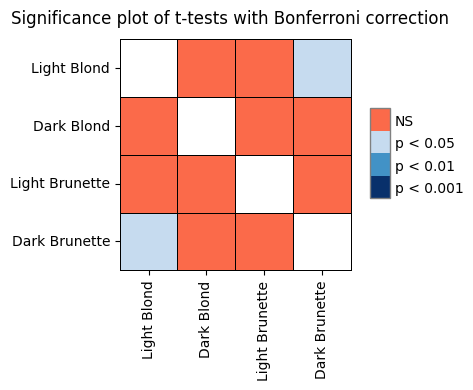

In [410]:
fig, ax = plt.subplots(figsize=(4,3))

ph.sign_plot(
    bonferroni_results,
    cmap=['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef'],
    linewidths=0.5, 
    linecolor='0',
    clip_on=False,
    square=True,
    cbar_ax_bbox= [0.85, 0.35, 0.05, 0.3],
    ax=ax
)

# Add plot title
plt.suptitle('Significance plot of t-tests with Bonferroni correction');

While the Bonferroni correction can be used to compare all pairs of means, it's generally not the preferred method for that purpose. Tukey's test offers more power for all pairwise comparisons, and Dunnett's test is more powerful for comparing each group to a control.

However, the Bonferroni correction is valuable when we only need to compare a limited set of specific pairs of means. By focusing on a smaller number of comparisons, we can obtain narrower confidence intervals and increase the statistical power to detect differences. We can leverage [Pingouin's `multicomp`](https://pingouin-stats.org/build/html/generated/pingouin.multicomp.html) to apply the Bonferroni correction. This function takes a list of P values and returns adjusted P values based on the chosen correction method.

In [411]:
# Specify the pairs we're interested in
pairs = [
    ('Dark Blond', 'Light Blond'),
    ('Dark Brunette', 'Light Brunette'),
    ('Light Blond', 'Light Brunette'),
]

# Loop over the pairs, perform t-tests, and collect P values
p_values = []
for pair in pairs:
    group1 = data_anova['Pain threshold'][data_anova['Hair color'] == pair[0]]
    group2 = data_anova['Pain threshold'][data_anova['Hair color'] == pair[1]]
    t_statistic, p_value = ttest_ind(group1, group2)
    p_values.append(p_value)

# Apply Bonferroni correction using pingouin.multicomp
_, adjusted_p_values_bonf = pg.multicomp(p_values, method='bonf')

# Print the adjusted P values
print("Adjusted P values (Bonferroni) for selected pairs:")
for pair, p_value in zip(pairs, adjusted_p_values_bonf):
    print(f"  - {pair}: {p_value:.3f}")

Adjusted P values (Bonferroni) for selected pairs:
  - ('Dark Blond', 'Light Blond'): 0.581
  - ('Dark Brunette', 'Light Brunette'): 0.984
  - ('Light Blond', 'Light Brunette'): 0.035


Remind that the Bonferroni correction controls the family-wise error rate (FWER) by dividing the significance level (α) by the number of comparisons.

In [412]:
# Adjust P values using Bonferroni correction
n_comparisons = len(p_values)  # Number of comparisons
adjusted_p_values_manual = np.array(p_values) * n_comparisons  # Multiply each P value by the number of comparisons

# Print the adjusted P values
print("Adjusted P values (Bonferroni):")
for pair, p_value in zip(pairs, adjusted_p_values_manual):
    print(f"{pair}: {p_value:.3f}")

Adjusted P values (Bonferroni):
('Dark Blond', 'Light Blond'): 0.581
('Dark Brunette', 'Light Brunette'): 0.984
('Light Blond', 'Light Brunette'): 0.035


### Other multiple comparison adjustments

Beyond the Tukey and Dunnett tests, and Bonferroni correction, several other methods can be used to adjust P values for multiple comparisons. These methods offer different ways to control the family-wise error rate or the false discovery rate, depending on the specific needs of the analysis.

- *Holm's test*: the Holm multiple comparisons test is a powerful and versatile method that can be used to compare all pairs of means, compare each group mean to a control mean, or compare preselected pairs of means. It determines which P values are low enough for the corresponding comparison to be declared statistically significant, adjusting the significance threshold based on the rank of the P values. The threshold for the smallest P value is much smaller than the threshold for the largest P value. Holm's test is generally considered superior to the Bonferroni adjustment due to its increased power while still controlling the family-wise error rate. However, it cannot compute confidence intervals.
- *Holm-Sidak test*: the Holm-Sidak test is a modified version of Holm's test that is slightly more powerful, especially when there are many comparisons.
- *Benjamini-Hochberg FDR (FDR BH) correction*: a philosophically different and more powerful adjustment method is the Benjamini-Hochberg procedure. This method controls the false discovery rate (FDR), which is the expected proportion of false positives among all positives that rejected the null hypothesis. In other words, FDR is the expected proportion of false positives among all the rejected null hypotheses, not among all the tests undertaken. We explained in details the concept of BH correction in the chapter on statistical significance.

We can leverage functions like `statsmodels.stats.multitest.multipletests` to apply these post-hoc corrections. Like Pingouin's `multicomp`, this function takes a list of P values and returns adjusted P values based on the chosen correction method.

In [413]:
from statsmodels.stats.multitest import multipletests

# Apply Holm correction on the previous list of P values using statsmodels multipletests
_, adjusted_p_values_holm, *_ = multipletests(p_values, method='holm')

# Print the adjusted P values
print("Adjusted P values (Holm) for selected pairs:")
for pair, p_value in zip(pairs, adjusted_p_values_holm):
    print(f"  - {pair}: {p_value:.3f}")

Adjusted P values (Holm) for selected pairs:
  - ('Dark Blond', 'Light Blond'): 0.387
  - ('Dark Brunette', 'Light Brunette'): 0.387
  - ('Light Blond', 'Light Brunette'): 0.035


In [414]:
# Apply Holm-Sidak correction on the previous list of P values using statsmodels multipletests
_, adjusted_p_values_holm_sidak, *_ = multipletests(p_values, method='holm-sidak')

# Print the adjusted P values
print("Adjusted P values (Holm-Sidak) for selected pairs:")
for pair, p_value in zip(pairs, adjusted_p_values_holm_sidak):
    print(f"  - {pair}: {p_value:.3f}")

Adjusted P values (Holm-Sidak) for selected pairs:
  - ('Dark Blond', 'Light Blond'): 0.350
  - ('Dark Brunette', 'Light Brunette'): 0.350
  - ('Light Blond', 'Light Brunette'): 0.035


In [415]:
# Apply FDR BH correction on the previous list of P values using statsmodels multipletests
_, adjusted_p_values_bh, *_ = multipletests(p_values, method='fdr_bh')

# Print the adjusted P values
print("Adjusted P values (FDR BH) for selected pairs:")
for pair, p_value in zip(pairs, adjusted_p_values_bh):
    print(f"  - {pair}: {p_value:.3f}")

Adjusted P values (FDR BH) for selected pairs:
  - ('Dark Blond', 'Light Blond'): 0.290
  - ('Dark Brunette', 'Light Brunette'): 0.328
  - ('Light Blond', 'Light Brunette'): 0.035


The Scheffé method is a versatile multiple comparisons test that can be used to compare all possible pairs of means, as well as any other subsets of means of interest. Unlike some other tests, the Scheffé method does not require specifying the specific comparisons beforehand. However, this flexibility comes at a cost: the confidence intervals generated by Scheffé's method are wider than those generated by other methods, such as Tukey's HSD test. This means that the Scheffé test has less statistical power to detect differences between groups.

The Scheffé method can be implemented using [the `posthoc_scheffe` function from the scikit-posthocs library](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_scheffe.html). This function takes the data and the grouping variable as input and returns the results of the Scheffé test, including the confidence intervals for all pairwise comparisons.

In [416]:
# Perform t-tests with Scheffé correction
scheffe_results = ph.posthoc_scheffe(
    data_anova,
    val_col='Pain threshold',
    group_col='Hair color',
)

# Print the results
print(scheffe_results)

                Light Blond  Dark Blond  Light Brunette  Dark Brunette
Light Blond        1.000000    0.513716        0.058896       0.007094
Dark Blond         0.513716    1.000000        0.493151       0.110869
Light Brunette     0.058896    0.493151        1.000000       0.833008
Dark Brunette      0.007094    0.110869        0.833008       1.000000


## Conclusion

In this chapter, we've explored the key concepts of ANOVA, a powerful statistical method for comparing means across different groups. We've seen how ANOVA can be applied to various research questions in biostatistics, helping us understand the effects of different factors on biological phenomena.

We've learned that choosing the appropriate ANOVA test is crucial, as the choice depends on the research design and the assumptions about the data. We discussed one-way ANOVA, repeated measures ANOVA, mixed-design ANOVA, and N-way ANOVA, each suitable for different experimental setups and research questions.

We also highlighted that one-way ANOVA can be seen as a regression model with a single categorical predictor, providing a connection between ANOVA and regression analysis.

Throughout the chapter, we've emphasized the advantages of using Python for performing ANOVA analysis. Python's libraries, such as Pingouin, Statsmodels, SciPy, and `scikit-posthocs`, a library dedicated to posthoc analysis, offer a versatile and user-friendly toolkit for conducting various ANOVA designs and post-hoc tests.

By combining the theoretical understanding of ANOVA with the practical tools available in Python, we've gained a comprehensive understanding of how to analyze complex datasets and draw meaningful conclusions from our research.

With the knowledge and skills we've acquired in this chapter, we're well-equipped to tackle a wide range of research questions and unlock the secrets hidden within our data.

## Cheat sheet

### One-way ANOVA

```python
# Plot the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x=x, y=y, data=data, hue=x)

# Overlay the stripplot
sns.stripplot(
    x=x, y=y, data=data
)

# Normality test
import pingouin as pg

pg.normality(data=data, dv=y, group=x)

# Homoscedasticity
pg.homoscedasticity(data=data, dv=y, group=x)

# ANOVA using Pingouin
pg.anova(data=data, dv=y, between=x)


# ANOVA using Statsmodels
from statsmodels.formula.api import ols

formula = "y ~ C(x)"

# Prepare the one-way ANOVA model using statsmodels
model = ols(formula=formula, data=data)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary2())

# Print the associated ANOVA table
from statsmodels.stats.anova import anova_lm

anova_lm(results)
```

### Repeated measures ANOVA

```python
# Prepare a long-format dataframe
data_long = data.reset_index().melt(
    id_vars=i,
    var_name=t,
    value_name=y)

# Create the paired plot
pg.plot_paired(
    data=data.reset_index().melt(id_vars=i, var_name=t, value_name=y),
    dv=y,
    within=t,
    subject=i)

# Test for sphericity
pg.sphericity(
    dv=y,
    within=t,
    subject=i,
    data=data_long)

# rmANOVA using Pingouin
pg.rm_anova(
    dv=y,
    within=t,
    subject=i,
    data=data_long)

# rmANOVA using Statsmodels
from statsmodels.stats.anova import AnovaRM

model = AnovaRM(
    data=data_long,
    depvar=y,
    subject=c,
    within=[t]
)

# Print the ANOVA table
print(model.fit())
```

### Non-parametric ANOVA

```python
# Perform the Kruskal-Wallis test using pingouin
pg.kruskal(data=data, dv=y, between=x)

# Perform Friedman's test
pg.friedman(
    data=data_long,
    dv=y,
    within=t,
    subject=c
)
```

### Two-way ANOVA

```python
# Create the boxplot
sns.boxplot(x=x, y=y, data=data, hue=g)

# Overlay the stripplot
sns.stripplot(x=x, y=y, data=data, hue=g, dodge=True)

# Perform two-way ANOVA using Pingouin
data.anova(
    dv=y,
    between=[x, g],
    #ss_type=2,  # For unbalanced designs
)

# Perform two-way ANOVA using Statsmodels
formula = "y ~ C(x)*C(g)"

model = ols(formula=formula, data=data)
results = model.fit()
anova_lm(
    results,
    #typ=2,  # For unbalanced designs
)
```

### Special designs

#### Mixed-design ANOVA

```python
# Perform mixed-design ANOVA using Pingouin
pg.mixed_anova(
    dv=y,
    between=g,
    within=t,
    subject=i,
    data=data,
)
```

### N-way ANOVA

```python
# Create the catplot with 'Drug' as the panel separation
sns.catplot(
    x=x,
    y=y,
    hue=a,
    col=b,
    data=data,
    kind='box',
    dodge=True,
)

# Perform three-way ANOVA with Pingouin
data.anova(
    dv=x,
    between=[x, a, b],
    #ss_type=2,  # For unbalanced designs
)

# Perform three-way ANOVA with statsmodels
results = ols(formula="y ~ x * a * b", data=data).fit()
anova_lm(
    results,
    #typ=2,  # For unbalanced designs
)
```

#### Two-way repeated measures ANOVA

```python
# Two-way repeated measures ANOVA with Pingouin
data.rm_anova(
    dv=y,
    within=[x, t],
    subject=i,
)

# Perform rmANOVA using AnovaRM
model = AnovaRM(
    data=data,
    depvar=y,
    subject=i,
    within=[x, t]
)

print(model.fit())
```

#### ANCOVA

```python
# Perform ANCOVA using pingouin
pg.ancova(
    data=data,
    dv=y,
    covar=[g],
    between=x
)

# Repeated measures correlation
pg.rm_corr(data=data, x=x, y=y, subject=g)

# Create the repeated measures correlation plot
pg.plot_rm_corr(
    data=data,
    x=x,
    y=y,
    subject='Method',
    legend=True
);
```

### Multiple comparison posthoc analysis

#### Tukey HSD and Tukey-Kramer

```python
# Tukey multiple comparison using Statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukeyhsd = pairwise_tukeyhsd(endog=data[y], groups=data[x])
print(tukeyhsd.summary())

q_crit = tukeyhsd.q_crit  #Critical value

# Plot the results of the Tukey HSD test
tukeyhsd.plot_simultaneous(comparison_name=reference)


# Perform Tukey's tests using Pingouin
# Unbalanced design (Tukey-Kramer) automatically handled
pg.pairwise_tukey(data, dv=y, between=x)


# Tukey's HSD test using scikit_posthocs
import scikit_posthocs as ph

tukey_hsd = ph.posthoc_tukey_hsd(
    data,
    val_col=y,
    group_col=x,
)

# Print the results
print(tukey_hsd)

# Create a significance table from the Tukey HSD results
print(ph.sign_table(tukey_hsd))

# Create a significance plot from the Tukey HSD results
ph.sign_plot(tukey_hsd,)
```

#### Dunnett's test

```python
# Dunnett's test using SciPy (new)
from scipy.stats import dunnett

# Extract the data for each group
groups = [
    data[y][data[x] == group]
    for group in [group1, group2, group3]
]
control = data[y][data[x] == reference]

# Perform Dunnett's test
dunnett(*groups, control=control)

# Perform Dunnett's test with scikit-posthocs
ph.posthoc_dunnett(
    data,
    val_col=y,
    group_col=x,
    control=reference,
    to_matrix=False,
)
```

#### Bonferroni's correction

```python
# Bonferroni's correction using SciPy and Statsmodels
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

# Create a MultiComparison object
mod = MultiComparison(
    data=data[y],
    groups=data[x],
)

# Perform the t-tests with Bonferroni correction
mod.allpairtest(testfunc=ttest_ind, method='bonf')

# Bonferroni's correction using Pingouin
pg.pairwise_tests(
    dv=y,
    between=x,
    data=data,
    padjust='bonf',
)

# Perform t-tests with Bonferroni correction in scikit-posthocs
bonferroni_results = ph.posthoc_ttest(
    data,
    val_col=y,
    group_col=x,
    pool_sd=False,
    p_adjust='bonferroni',
)

# Print the results
print(bonferroni_results)

# Significance table
print(ph.sign_table(bonferroni_results, lower=False))

# Significance plot
ph.sign_plot(bonferroni_results)
```

#### Other multiple comparison adjustments

```python
# Multicomp
# Specify the pairs we're interested in
pairs = [
    (a, b),
    (a, c),
    (a, d),
]

# Loop over the pairs, perform t-tests, and collect P values
p_values = []
for pair in pairs:
    group1 = data[y][data[x] == pair[0]]
    group2 = data[y][data[x] == pair[1]]
    t_statistic, p_value = ttest_ind(group1, group2)
    p_values.append(p_value)

# Apply Bonferroni correction using pingouin.multicomp
pg.multicomp(p_values, method='bonf')

# Multiple comparison adjustments using Statsmodels
from statsmodels.stats.multitest import multipletests

# Apply Holm correction on the previous list of P values using statsmodels multipletests
multipletests(p_values, method='holm')

# Apply Holm-Sidak correction on the previous list of P values using statsmodels multipletests
multipletests(p_values, method='holm-sidak')

# Apply FDR BH correction on the previous list of P values using statsmodels multipletests
multipletests(p_values, method='fdr_bh')

# Perform t-tests with Scheffé correction in scikit-posthocs
ph.posthoc_scheffe(data, val_col=y, group_col=x)
```


## Session information

The output below details all packages and version necessary to reproduce the results in this report.

In [417]:
!python --version
print("-------------")

from importlib.metadata import version

# List of packages we want to check the version
packages = ['numpy', 'pandas', 'scipy', 'statsmodels', 'pingouin', 'scikit_posthocs', 'matplotlib', 'seaborn']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    try:
        # Get the version of the package
        package_version = version(package)
        # Append the version to the list
        versions.append(package_version)
    except Exception:  # Use a more general exception for broader compatibility
        versions.append('Not installed')

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.9
-------------


numpy: 1.26.4
pandas: 2.2.2
scipy: 1.14.1
statsmodels: 0.14.2
pingouin: 0.5.5
scikit_posthocs: 0.11.2
matplotlib: 3.9.2
seaborn: 0.13.2
